# Customer Segmentation — Credit Card Dataset

## 1 · Setup & Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.pipeline import Pipeline

from sklearn.manifold import TSNE
import umap

import kagglehub
import os

sns.set_style("whitegrid")
plt.rcParams.update({
    "figure.figsize": (8, 6),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "font.size": 11,
})

In [2]:
# path = kagglehub.dataset_download("arjunbhasin2013/ccdata")


# csv_file = [f for f in os.listdir(path) if f.endswith(".csv")][0]
# df = pd.read_csv(os.path.join(path, csv_file))
# df.head()

In [3]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

### Variable Descriptions

1.  **CUST_ID**: Identification of the Credit Card holder (Categorical).

2.  **BALANCE**: Balance amount left in the account to make purchases.

3.  **BALANCE_FREQUENCY**: How frequently the Balance is updated (score between 0 and 1, where 1 = frequently updated).

4.  **PURCHASES**: Total amount of purchases made from the account.
5.  **ONEOFF_PURCHASES**: Maximum purchase amount done in a single transaction (one-go).
6.  **INSTALLMENTS_PURCHASES**: Amount of purchases done in installments.
7.  **CASH_ADVANCE**: Cash in advance given by the user (withdrawing cash using the card).
8.  **PURCHASES_FREQUENCY**: How frequently purchases are being made (score between 0 and 1).
9.  **ONEOFF_PURCHASES_FREQUENCY**: How frequently purchases happen in "one-go" (score between 0 and 1).
10. **PURCHASES_INSTALLMENTS_FREQUENCY**: How frequently purchases in installments are being done (score between 0 and 1).
11. **CASH_ADVANCE_FREQUENCY**: How frequently the "cash in advance" service is being used.
12. **CASH_ADVANCE_TRX**: Number of transactions made with "Cash in Advance".
13. **PURCHASES_TRX**: Number of purchase transactions made.
14. **CREDIT_LIMIT**: The credit limit assigned to the user.
15. **PAYMENTS**: Total amount of payments made by the user.
16. **MINIMUM_PAYMENTS**: Minimum amount of payments made by the user.
17. **PRC_FULL_PAYMENT**: Percentage of the full payment paid by the user.
18. **TENURE**: Tenure of credit card service for the user (number of months).

## 2 · Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
missing = df.isnull().sum()
missing

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
(missing / len(df) * 100).round(2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

#### Why Are Values Missing?

In [7]:
miss_mp    = df[df["MINIMUM_PAYMENTS"].isna()]
present_mp = df[df["MINIMUM_PAYMENTS"].notna()]

compare_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE",
                "PAYMENTS", "CREDIT_LIMIT", "PRC_FULL_PAYMENT", "TENURE"]

comparison = pd.DataFrame({
    "Mean (missing)" : miss_mp[compare_cols].mean(),
    "Mean (present)" : present_mp[compare_cols].mean(),
    "Median (missing)": miss_mp[compare_cols].median(),
    "Median (present)": present_mp[compare_cols].median(),
}).round(2)

comparison

Mean (missing)  Mean (present)  Median (missing)  \
BALANCE                   555.44         1601.04             16.85   
PURCHASES                 393.09         1025.32            130.40   
CASH_ADVANCE              559.14          994.08              0.00   
PAYMENTS                  322.29         1784.27              0.00   
CREDIT_LIMIT             3731.79         4522.09           3000.00   
PRC_FULL_PAYMENT            0.00            0.16              0.00   
TENURE                     11.06           11.53             12.00   

                  Median (present)  
BALANCE                     916.75  
PURCHASES                   375.24  
CASH_ADVANCE                  0.00  
PAYMENTS                    896.30  
CREDIT_LIMIT               3000.00  
PRC_FULL_PAYMENT              0.00  
TENURE                       12.00

In [8]:
miss_cl = df[df["CREDIT_LIMIT"].isna()]
miss_cl.T.style

#### Missing-Value Analysis

**MINIMUM_PAYMENTS (313 missing — 3.5 %)**

The missingness is **not random**. Customers with missing MINIMUM_PAYMENTS tend to have:
- **Lower or zero PAYMENTS** — if a customer never made a payment, the bank cannot compute a minimum-payment amount.
- **Lower PURCHASES and BALANCE** — these accounts show less activity overall.
- This pattern is consistent with **inactive or newly opened accounts** where no billing cycle with a payment has occurred yet.

> **Conclusion**: The values are likely **Missing Not At Random (MNAR)** — the missingness is driven by the variable itself (no payment → no minimum payment). Imputing with the **median** (or 0) is a reasonable strategy.

---

**CREDIT_LIMIT (1 missing — 0.01 %)**

Only **one row** is affected. This is most likely a **data-entry or system error** — a single record that failed to capture the credit limit.

> **Conclusion**: The value is likely **Missing Completely At Random (MCAR)**. i will drop it.

In [9]:
df.duplicated().sum()

np.int64(0)

### Feature-Level EDA — Box Plots & Distributions

Features are split into **three subgroups** by their value range so plots within each group share a comparable scale.
Each subgroup shows box plots (outlier structure) → distributions (shape & skew) → full analysis.

In [10]:
numeric_cols = df.select_dtypes(include="number").columns.tolist()
ranges = df[numeric_cols].max() - df[numeric_cols].min()

high_value = ranges[ranges > 1000].index.tolist()
mid_value  = ranges[(ranges > 1) & (ranges <= 1000)].index.tolist()
low_value  = ranges[ranges <= 1].index.tolist()

if "CASH_ADVANCE_FREQUENCY" in mid_value:
    mid_value.remove("CASH_ADVANCE_FREQUENCY")
    low_value.append("CASH_ADVANCE_FREQUENCY")

print("High-Value Monetary:", high_value)
print("Transaction Counts :", mid_value)
print("Rate / Frequency   :", low_value)

High-Value Monetary: ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
Transaction Counts : ['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE']
Rate / Frequency   : ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PRC_FULL_PAYMENT', 'CASH_ADVANCE_FREQUENCY']


#### Subgroup 1 — High-Value Monetary Features (range > 1 000)

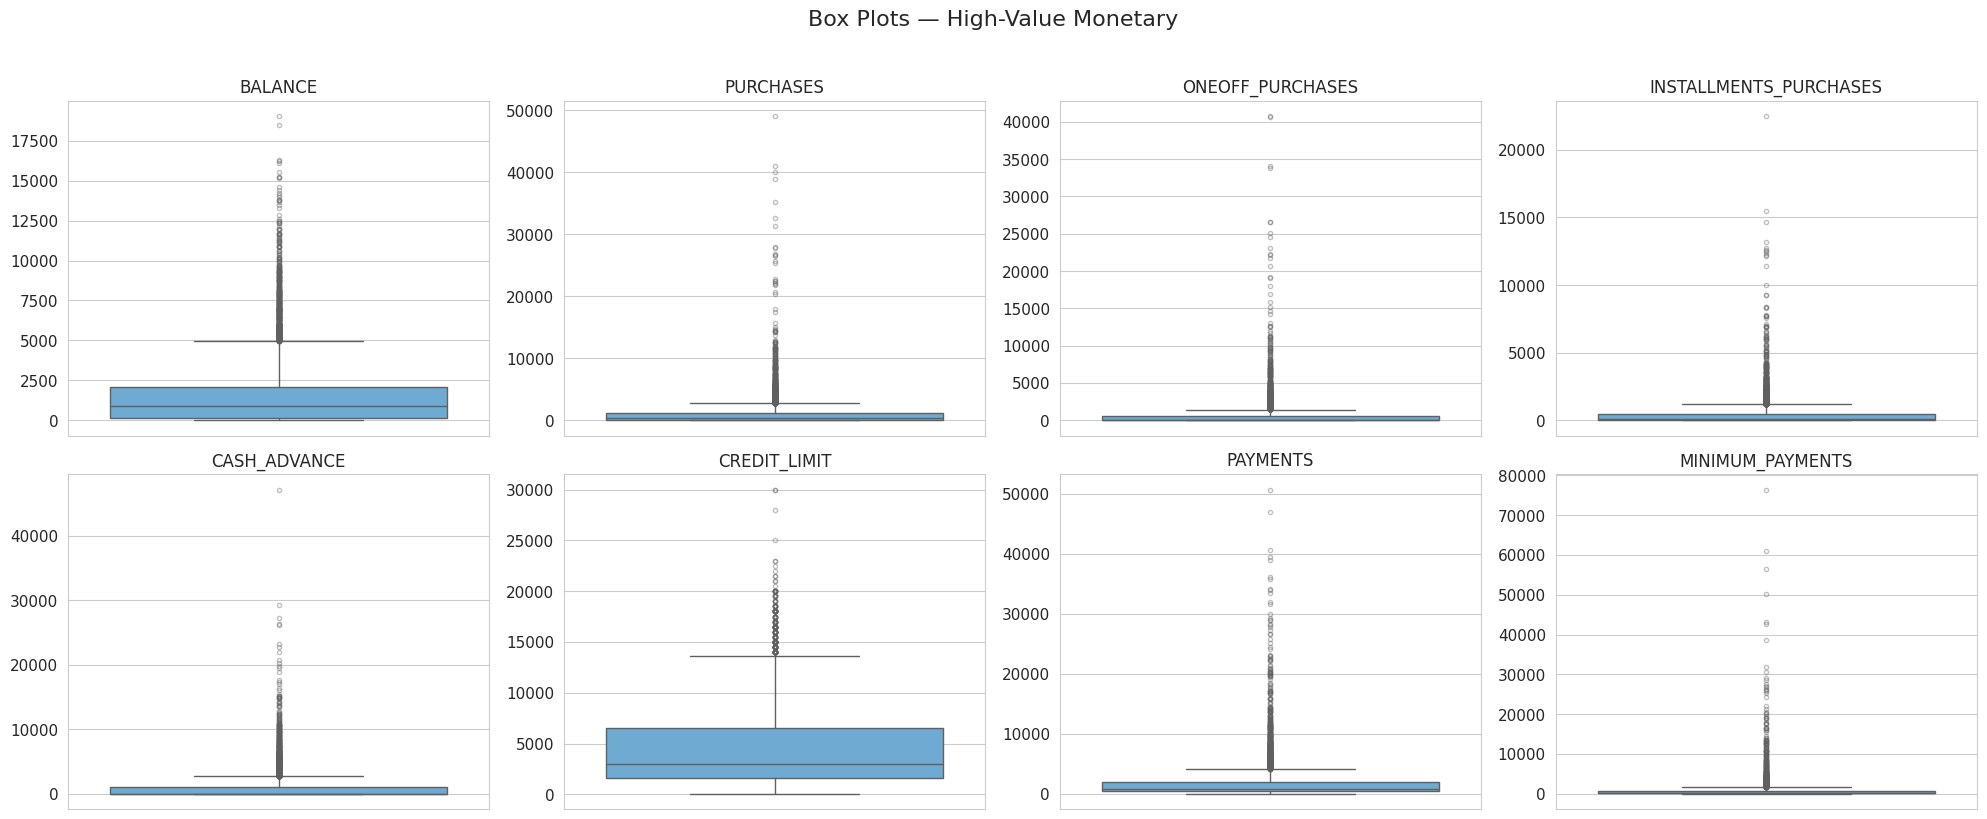

In [11]:
cols = high_value
n = len(cols)
ncols_g = min(n, 4)
nrows_g = (n + ncols_g - 1) // ncols_g

fig, axes = plt.subplots(nrows_g, ncols_g, figsize=(5*ncols_g, 4*nrows_g))
fig.suptitle("Box Plots — High-Value Monetary", fontsize=16, y=1.02)
axes = np.array(axes).flatten()
for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i], color="#5DADE2",
                flierprops={"marker":"o","markersize":3,"alpha":0.4})
    axes[i].set_title(col, fontsize=12); axes[i].set_ylabel("")
for j in range(n, len(axes)): axes[j].set_visible(False)
plt.tight_layout(); plt.show()

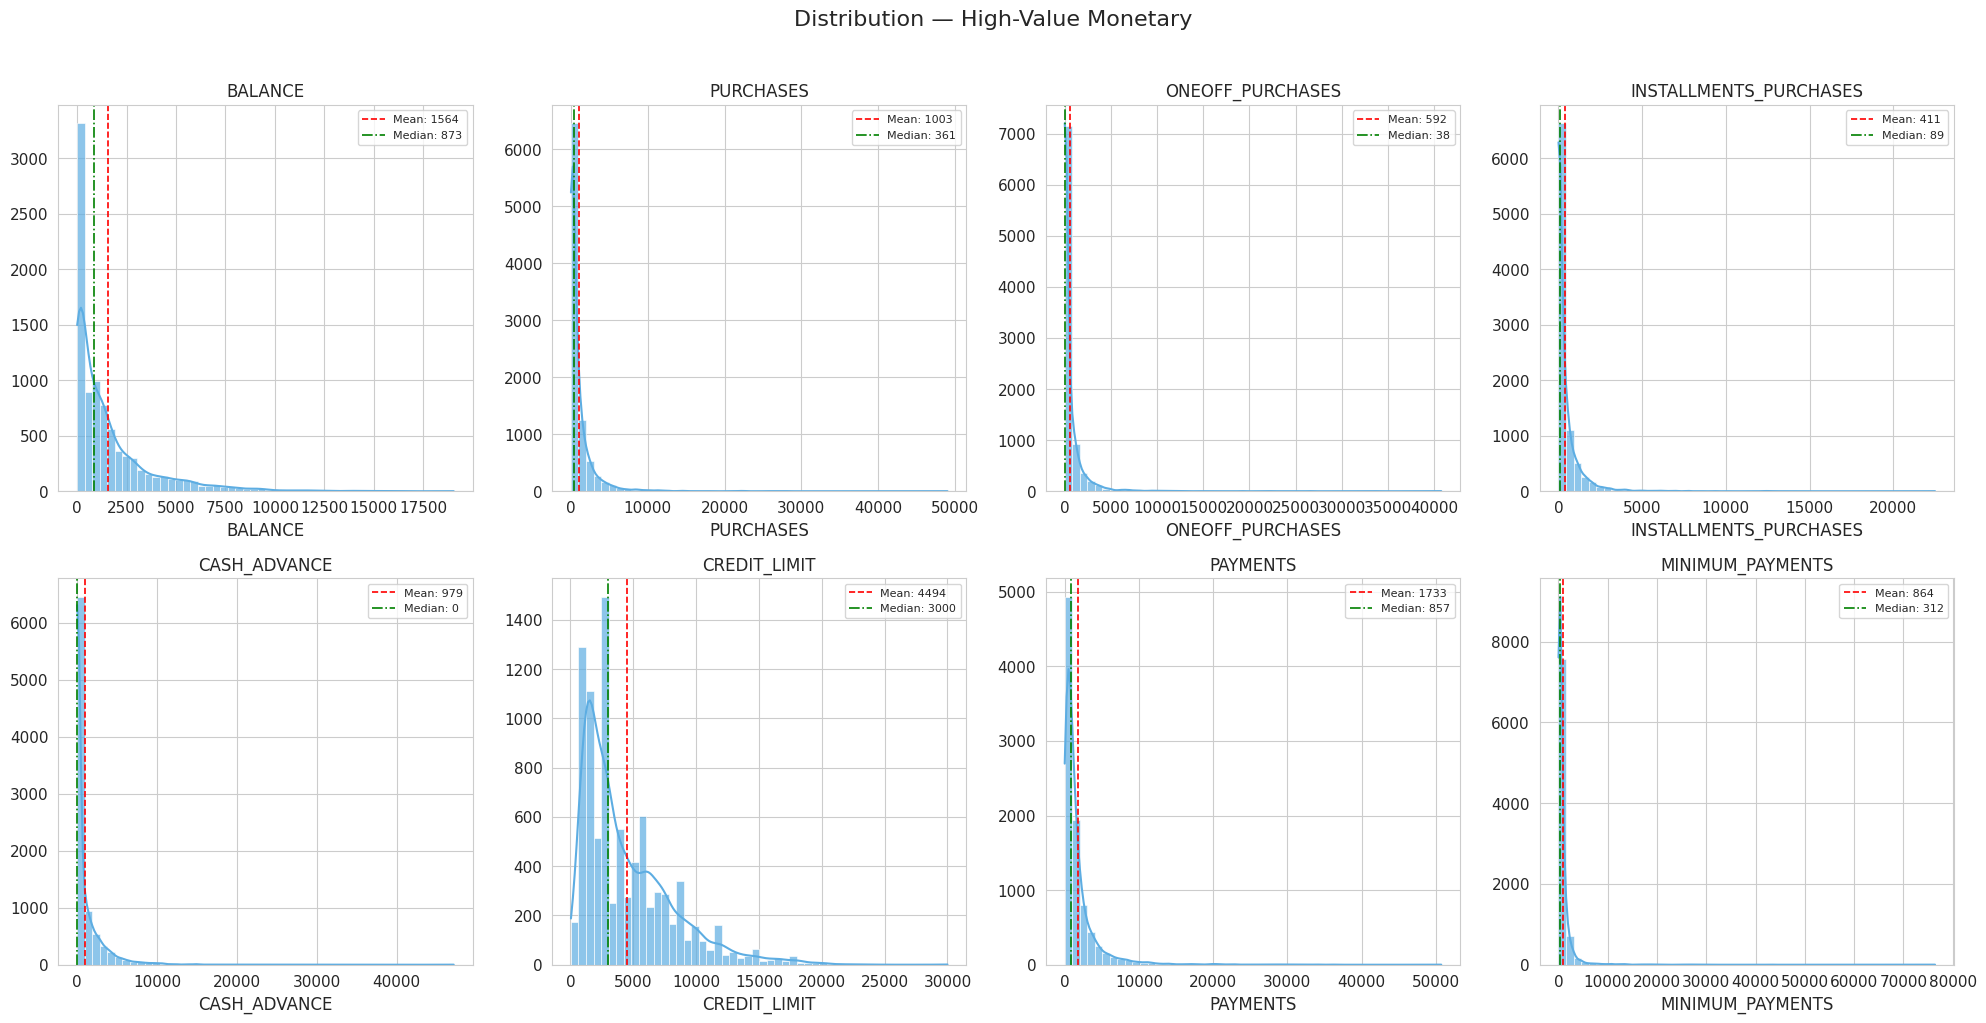

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count   8950.00    8950.00           8950.00                 8950.00   
mean    1564.47    1003.20            592.44                  411.07   
std     2081.53    2136.63           1659.89                  904.34   
min        0.00       0.00              0.00                    0.00   
25%      128.28      39.64              0.00                    0.00   
50%      873.39     361.28             38.00                   89.00   
75%     2054.14    1110.13            577.40                  468.64   
max    19043.14   49039.57          40761.25                22500.00   

       CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  
count       8950.00       8949.00   8950.00           8637.00  
mean         978.87       4494.45   1733.14            864.21  
std         2097.16       3638.82   2895.06           2372.45  
min            0.00         50.00      0.00              0.02  
25%            0.00       1600.00    383.28            169.12  
50%            0.00       3000.00    856.90            312.34  
75%         1113.82       6500.00   1901.13            825.49  
max        47137.21      30000.00  50721.48          76406.21

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Distribution — High-Value Monetary", fontsize=16, y=1.02)
axes = axes.flatten()
for i, col in enumerate(high_value):
    sns.histplot(df[col], kde=True, ax=axes[i], color="#5DADE2",
                edgecolor="white", bins=50, alpha=0.7)
    axes[i].set_title(col, fontsize=12); axes[i].set_ylabel("")
    axes[i].axvline(df[col].mean(), color="red", ls="--", lw=1.2, label=f"Mean: {df[col].mean():.0f}")
    axes[i].axvline(df[col].median(), color="green", ls="-.", lw=1.2, label=f"Median: {df[col].median():.0f}")
    axes[i].legend(fontsize=8)
for j in range(len(high_value), len(axes)): axes[j].set_visible(False)
plt.tight_layout(); plt.show()

df[high_value].describe().round(2)

#### Analysis — High-Value Monetary Features

| Feature | Box Plot | Distribution | Key Insight |
|---------|----------|-------------|-------------|
| BALANCE | Many outliers above upper whisker | Exponential-like, spike near 0 | Large cluster of near-zero balances; heavy right tail |
| PURCHASES | Extreme upper outliers | Zero spike + right tail | Two populations: **non-purchasers** (0) and **active buyers** |
| ONEOFF_PURCHASES | Whisker compressed to 0 | Zero-inflated | Majority **never** make one-off purchases |
| INSTALLMENTS_PURCHASES | Similar compression at 0 | Zero-inflated | Installment usage is a minority behaviour |
| CASH_ADVANCE | Box nearly flat at 0 | Extreme zero-inflation | Most customers **never** take cash advances; very long tail |
| CREDIT_LIMIT | Wider IQR, fewer outliers | Right-skewed, multi-modal | Modes possibly reflect standard card tiers (1k, 3k, 5k…) |
| PAYMENTS | Significant upper outliers | Exponential-like | Mean >> Median; a few customers make disproportionately large payments |
| MINIMUM_PAYMENTS | Extreme outliers | Power-law shape | Strongest candidate for **log transformation** |



> **Summary**: All monetary features are **heavily right-skewed** with mean 2–5× larger than median. Log or power transformation is essential before clustering to reduce outlier influence.

#### Subgroup 2 — Transaction Count Features (1 < range ≤ 1 000)

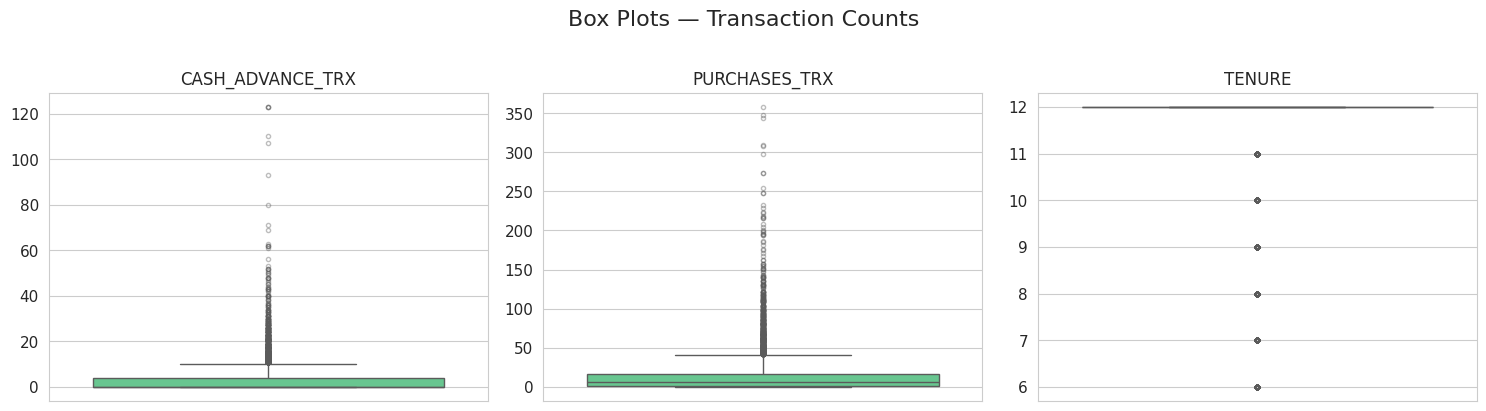

In [13]:
cols = mid_value
n = len(cols)
ncols_g = min(n, 4)
nrows_g = max((n + ncols_g - 1) // ncols_g, 1)

fig, axes = plt.subplots(nrows_g, ncols_g, figsize=(5*ncols_g, 4*nrows_g))
fig.suptitle("Box Plots — Transaction Counts", fontsize=16, y=1.02)
axes = np.array(axes).flatten()
for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i], color="#58D68D",
                flierprops={"marker":"o","markersize":3,"alpha":0.4})
    axes[i].set_title(col, fontsize=12); axes[i].set_ylabel("")
for j in range(n, len(axes)): axes[j].set_visible(False)
plt.tight_layout(); plt.show()

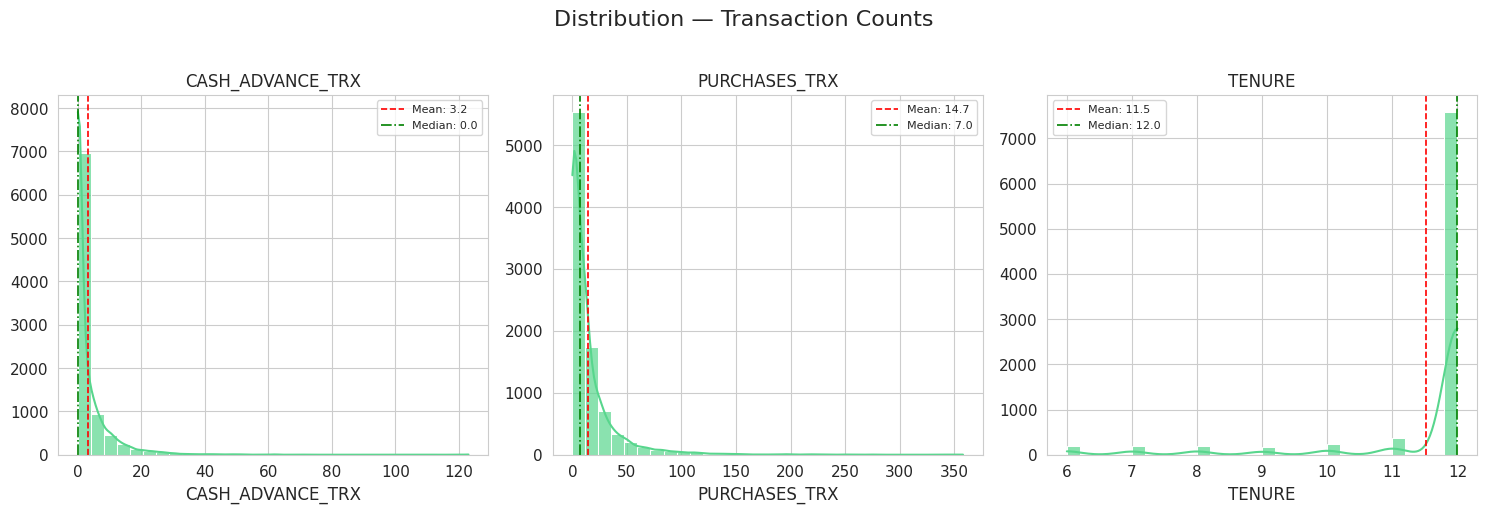

CASH_ADVANCE_TRX  PURCHASES_TRX   TENURE
count           8950.00        8950.00  8950.00
mean               3.25          14.71    11.52
std                6.82          24.86     1.34
min                0.00           0.00     6.00
25%                0.00           1.00    12.00
50%                0.00           7.00    12.00
75%                4.00          17.00    12.00
max              123.00         358.00    12.00

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Distribution — Transaction Counts", fontsize=16, y=1.02)
for i, col in enumerate(mid_value):
    sns.histplot(df[col], kde=True, ax=axes[i], color="#58D68D",
                edgecolor="white", bins=30, alpha=0.7)
    axes[i].set_title(col, fontsize=12); axes[i].set_ylabel("")
    axes[i].axvline(df[col].mean(), color="red", ls="--", lw=1.2, label=f"Mean: {df[col].mean():.1f}")
    axes[i].axvline(df[col].median(), color="green", ls="-.", lw=1.2, label=f"Median: {df[col].median():.1f}")
    axes[i].legend(fontsize=8)
plt.tight_layout(); plt.show()

df[mid_value].describe().round(2)

#### Analysis — Transaction Count Features

| Feature | Box Plot | Distribution | Key Insight |
|---------|----------|-------------|-------------|
| CASH_ADVANCE_TRX | Box at 0, many upper outliers | ~75% are 0 | Consistent with monetary cash-advance — most customers never use it |
| PURCHASES_TRX | Wider box, long upper tail | Right-skewed, more spread | Most < 20 txns but tail reaches 300+ |
| TENURE | Very tight box at 12 | Near-constant spike at 12 | ~95% of customers have 12 months — **very low variance** |


> **Summary**: Count features are **discrete and zero-inflated**. TENURE is essentially constant and should be considered for **removal** before clustering to avoid adding noise.

#### Subgroup 3 — Rate / Frequency Features (range ≤ 1)

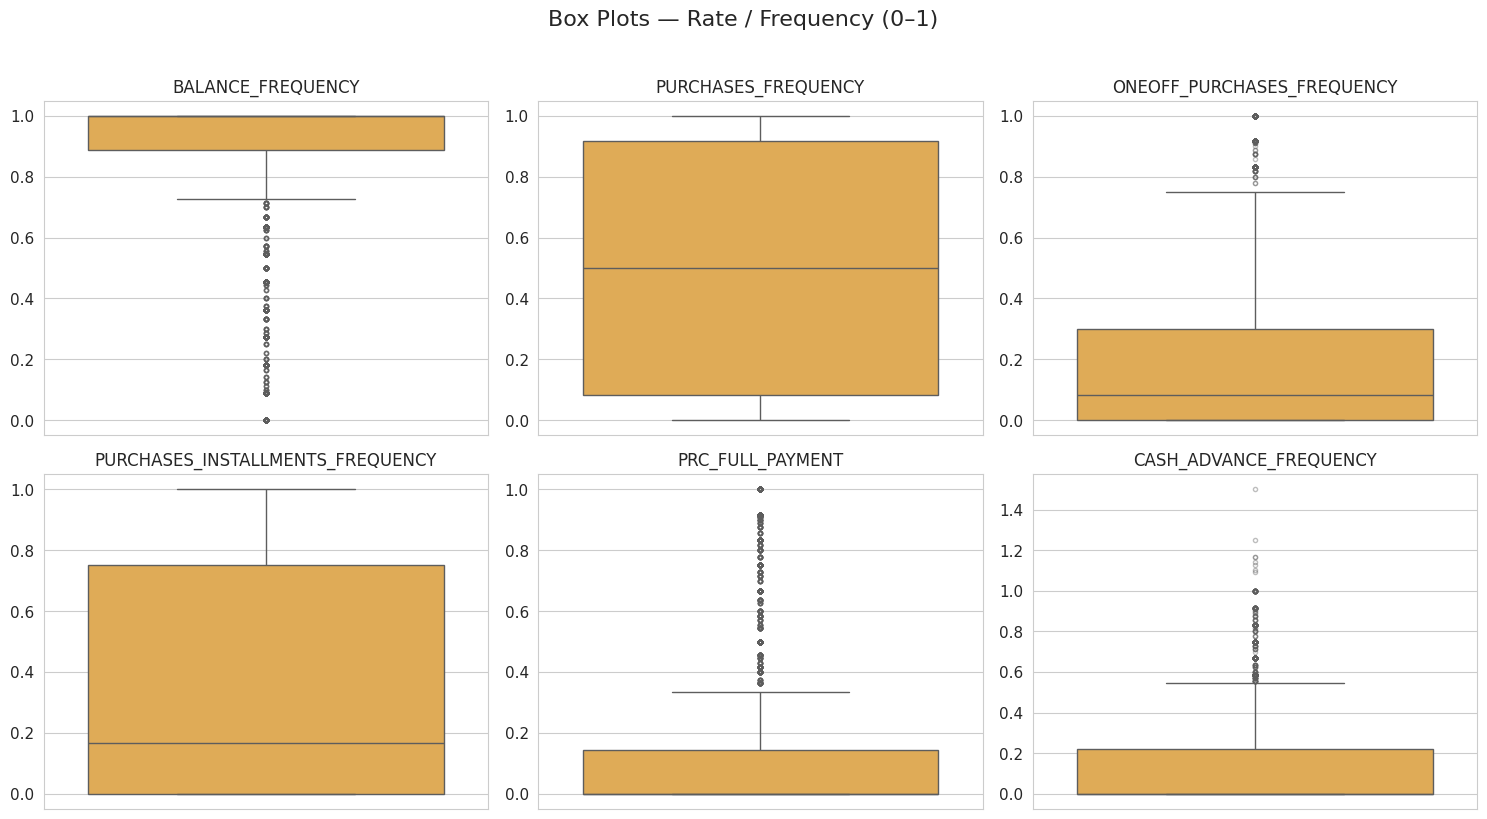

In [15]:
cols = low_value
n = len(cols)
ncols_g = min(n, 3)
nrows_g = max((n + ncols_g - 1) // ncols_g, 1)

fig, axes = plt.subplots(nrows_g, ncols_g, figsize=(5*ncols_g, 4*nrows_g))
fig.suptitle("Box Plots — Rate / Frequency (0–1)", fontsize=16, y=1.02)
axes = np.array(axes).flatten()
for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i], color="#F5B041",
                flierprops={"marker":"o","markersize":3,"alpha":0.4})
    axes[i].set_title(col, fontsize=12); axes[i].set_ylabel("")
for j in range(n, len(axes)): axes[j].set_visible(False)
plt.tight_layout(); plt.show()

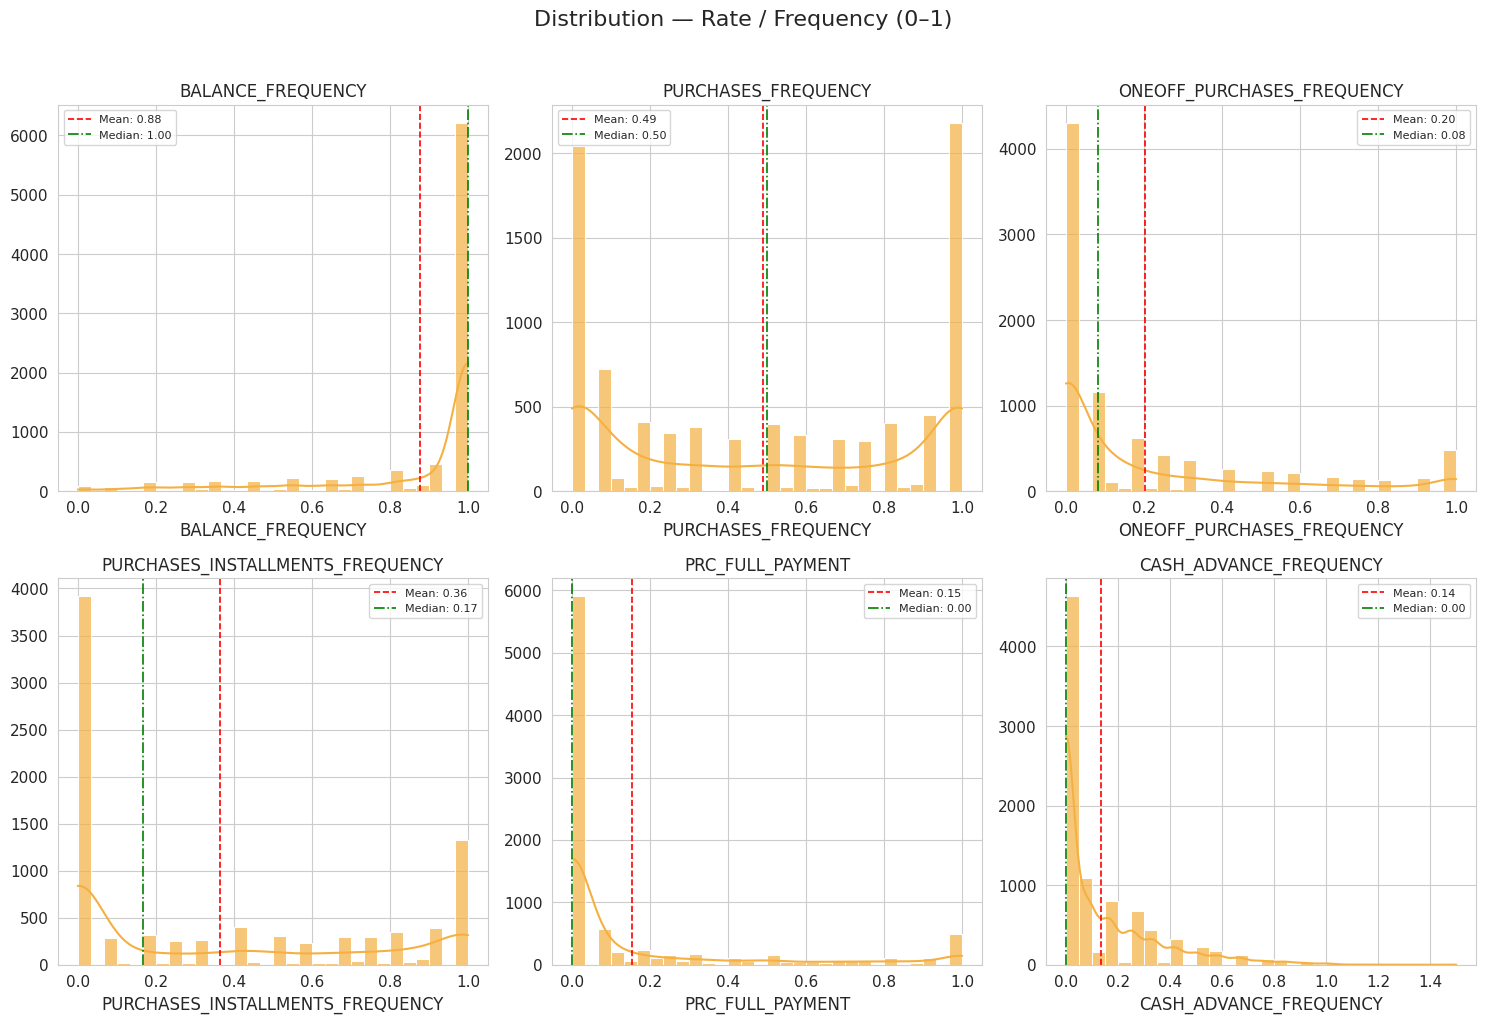

BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count            8950.00              8950.00                     8950.00   
mean                0.88                 0.49                        0.20   
std                 0.24                 0.40                        0.30   
min                 0.00                 0.00                        0.00   
25%                 0.89                 0.08                        0.00   
50%                 1.00                 0.50                        0.08   
75%                 1.00                 0.92                        0.30   
max                 1.00                 1.00                        1.00   

       PURCHASES_INSTALLMENTS_FREQUENCY  PRC_FULL_PAYMENT  \
count                           8950.00           8950.00   
mean                               0.36              0.15   
std                                0.40              0.29   
min                                0.00              0.00   
25%                                0.00              0.00   
50%                                0.17              0.00   
75%                                0.75              0.14   
max                                1.00              1.00   

       CASH_ADVANCE_FREQUENCY  
count                 8950.00  
mean                     0.14  
std                      0.20  
min                      0.00  
25%                      0.00  
50%                      0.00  
75%                      0.22  
max                      1.50

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Distribution — Rate / Frequency (0–1)", fontsize=16, y=1.02)
axes = axes.flatten()
for i, col in enumerate(low_value):
    sns.histplot(df[col], kde=True, ax=axes[i], color="#F5B041",
                edgecolor="white", bins=30, alpha=0.7)
    axes[i].set_title(col, fontsize=12); axes[i].set_ylabel("")
    axes[i].axvline(df[col].mean(), color="red", ls="--", lw=1.2, label=f"Mean: {df[col].mean():.2f}")
    axes[i].axvline(df[col].median(), color="green", ls="-.", lw=1.2, label=f"Median: {df[col].median():.2f}")
    axes[i].legend(fontsize=8)
for j in range(len(low_value), len(axes)): axes[j].set_visible(False)
plt.tight_layout(); plt.show()

df[low_value].describe().round(2)

#### Analysis — Rate / Frequency Features

| Feature | Box Plot | Distribution | Key Insight |
|---------|----------|-------------|-------------|
| BALANCE_FREQUENCY | Box compressed near 1.0 | Strong left skew, peak at 1 | Most customers update balance **every month** |
| PURCHASES_FREQUENCY | Wide box (high IQR) | U-shaped / bimodal | Two clear populations: non-purchasers (~0) vs regulars (~1) — **strong segmentation signal** |
| ONEOFF_PURCHASES_FREQ | Box at 0 | Heavy spike at 0 | Majority never buy one-off |
| PURCH_INSTALL_FREQ | Box at 0, slight spread | Spike at 0, modest spread | Slightly more engagement than one-off |
| CASH_ADVANCE_FREQUENCY | Box flat at 0 | Extreme spike at 0 | Reinforces rarity of cash advance usage |
| PRC_FULL_PAYMENT | Box flat at 0, upper outliers at 1 | Near-binary (0 vs 1) | Vast majority **never pay in full**; could be engineered into a flag |


> **Summary**: Frequency features are **bounded [0, 1]** and often **zero-inflated or bimodal**. They do not need scaling but their shape should inform the clustering method. PURCHASES_FREQUENCY is one of the most promising segmentation features.

### Correlation Heatmap

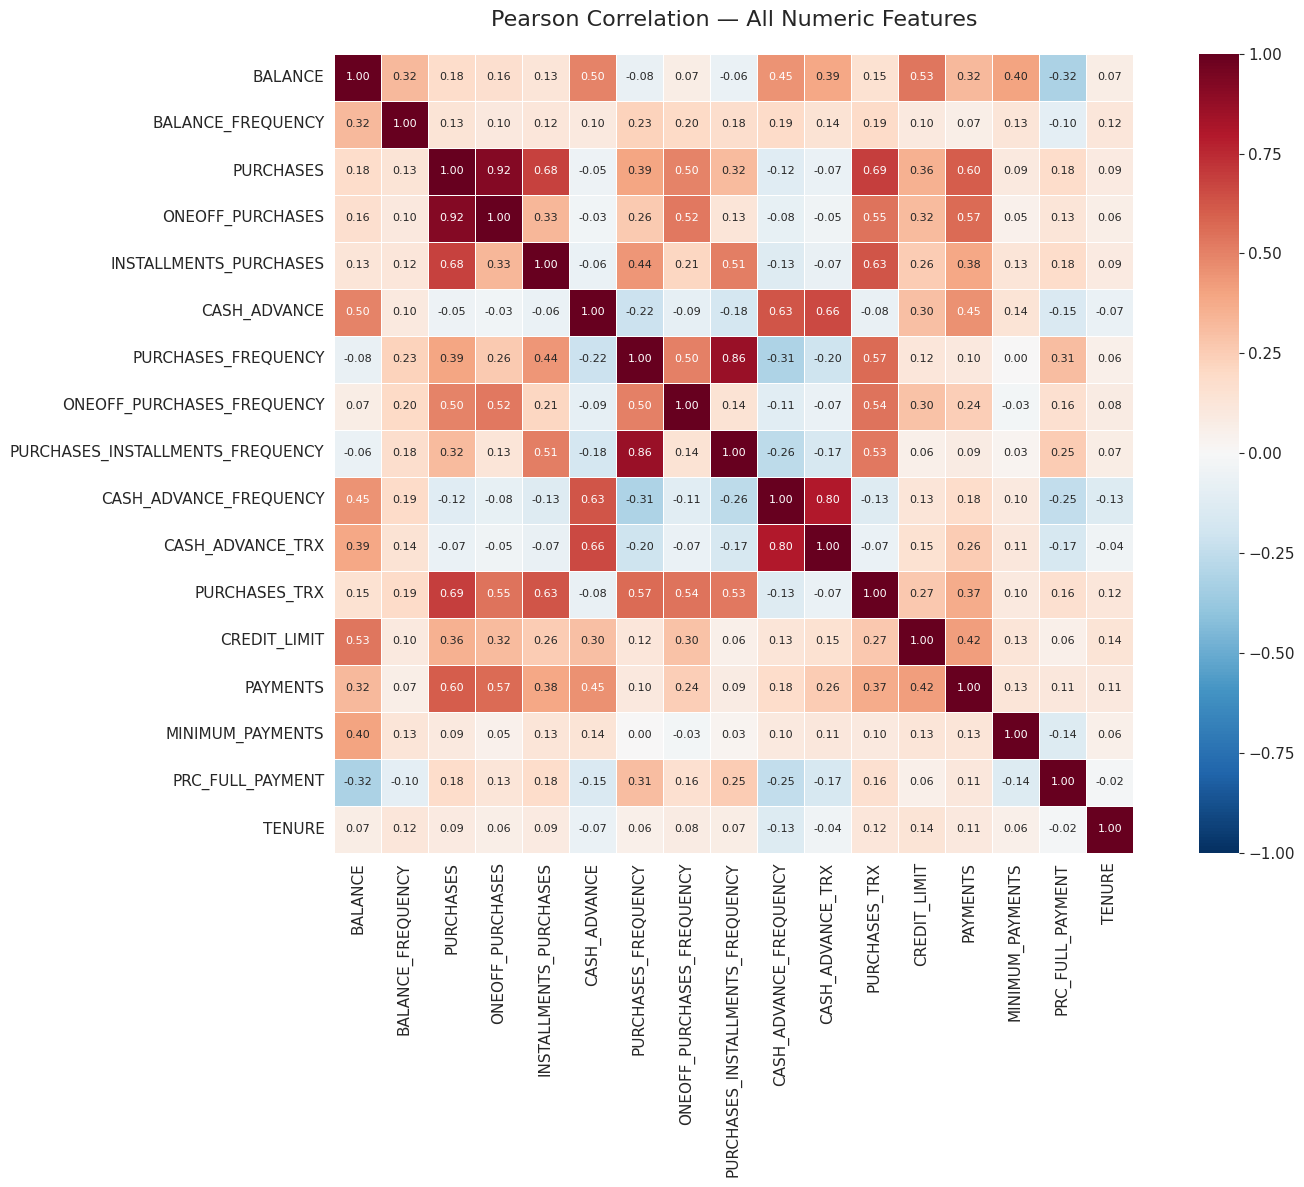

In [17]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,  annot=True, fmt=".2f", cmap="RdBu_r",
            center=0, vmin=-1, vmax=1, linewidths=0.5,
            annot_kws={"size": 8}, square=True)
plt.title("Pearson Correlation — All Numeric Features", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [18]:
strong = (
    corr.where(~np.triu(np.ones_like(corr, dtype=bool)))
    .stack()
    .reset_index()
)
strong.columns = ["Feature_1", "Feature_2", "Correlation"]
strong = strong[strong["Correlation"].abs() >= 0.5]
strong = strong.sort_values("Correlation", ascending=False, key=abs)
print(f"Feature pairs with |r| >= 0.5  ({len(strong)} pairs):\n")
strong.reset_index(drop=True)

Feature pairs with |r| >= 0.5  (18 pairs):



Feature_1                         Feature_2  \
0                   ONEOFF_PURCHASES                         PURCHASES   
1   PURCHASES_INSTALLMENTS_FREQUENCY               PURCHASES_FREQUENCY   
2                   CASH_ADVANCE_TRX            CASH_ADVANCE_FREQUENCY   
3                      PURCHASES_TRX                         PURCHASES   
4             INSTALLMENTS_PURCHASES                         PURCHASES   
5                   CASH_ADVANCE_TRX                      CASH_ADVANCE   
6             CASH_ADVANCE_FREQUENCY                      CASH_ADVANCE   
7                      PURCHASES_TRX            INSTALLMENTS_PURCHASES   
8                           PAYMENTS                         PURCHASES   
9                      PURCHASES_TRX               PURCHASES_FREQUENCY   
10                          PAYMENTS                  ONEOFF_PURCHASES   
11                     PURCHASES_TRX                  ONEOFF_PURCHASES   
12                     PURCHASES_TRX        ONEOFF_PURCHASES_FREQUENCY   
13                      CREDIT_LIMIT                           BALANCE   
14                     PURCHASES_TRX  PURCHASES_INSTALLMENTS_FREQUENCY   
15        ONEOFF_PURCHASES_FREQUENCY                  ONEOFF_PURCHASES   
16  PURCHASES_INSTALLMENTS_FREQUENCY            INSTALLMENTS_PURCHASES   
17        ONEOFF_PURCHASES_FREQUENCY               PURCHASES_FREQUENCY   

    Correlation  
0      0.916845  
1      0.862934  
2      0.799561  
3      0.689561  
4      0.679896  
5      0.656498  
6      0.628522  
7      0.628108  
8      0.603264  
9      0.568430  
10     0.567292  
11     0.545523  
12     0.544869  
13     0.531283  
14     0.529975  
15     0.524891  
16     0.511351  
17     0.501343

#### Correlation Analysis

**Very strong (|r| ≥ 0.8)**
- PURCHASES ↔ ONEOFF_PURCHASES / INSTALLMENTS_PURCHASES — expected, since total purchases = one-off + installments
- PURCHASES ↔ PURCHASES_TRX / PURCHASES_FREQUENCY — amount, count, and frequency all capture the same purchasing behaviour
- CASH_ADVANCE ↔ CASH_ADVANCE_TRX / CASH_ADVANCE_FREQUENCY — same pattern for cash advances

**Moderate (0.5 ≤ |r| < 0.8)**
- CREDIT_LIMIT ↔ BALANCE / PURCHASES / PAYMENTS — higher credit limits enable higher spending and balances
- ONEOFF_PURCHASES ↔ ONEOFF_PURCHASES_FREQUENCY — redundant encoding


## 3 · Data Preprocessing

In [19]:
df_cleaned = df.copy()

df_cleaned["MINIMUM_PAYMENTS"].fillna(0, inplace=True)

df_cleaned.dropna(subset=["CREDIT_LIMIT"], inplace=True)

print(f"Remaining NAs: {df_cleaned.isnull().sum().sum()}")
print(f"Shape: {df_cleaned.shape}")

Remaining NAs: 0
Shape: (8949, 18)


/tmp/ipykernel_11465/3127741385.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["MINIMUM_PAYMENTS"].fillna(0, inplace=True)


In [20]:
df_cleaned.drop(columns=["CUST_ID", "TENURE"], inplace=True)

print(f"Remaining columns ({len(df_cleaned.columns)}): {df_cleaned.columns.tolist()}")

Remaining columns (16): ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


In [21]:
df_cleaned_without_log = df_cleaned.copy() 

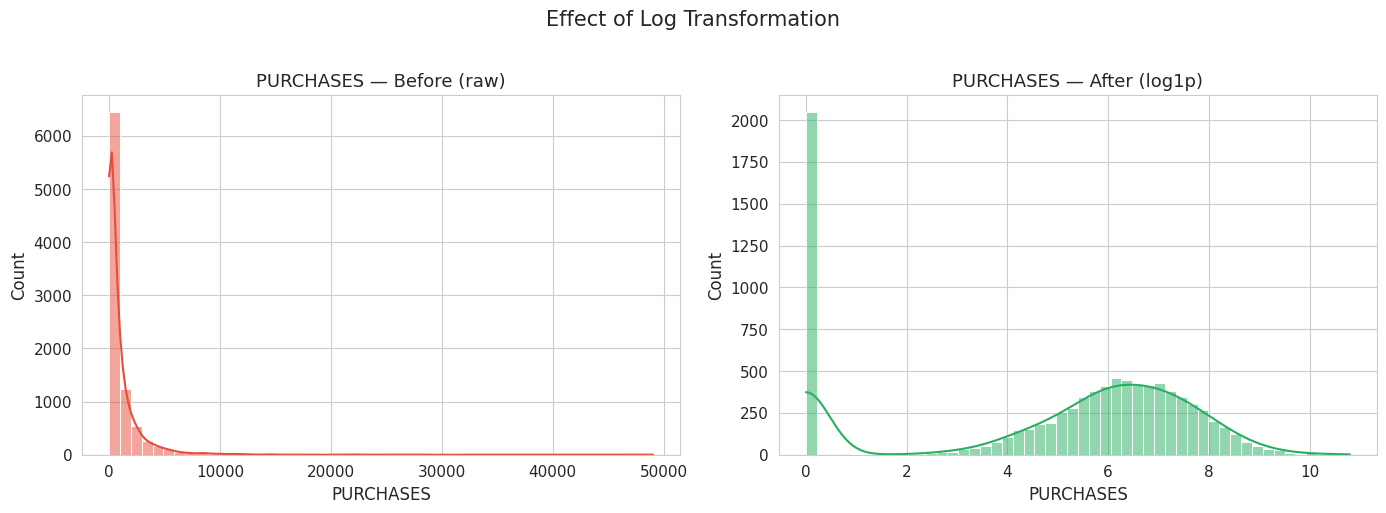

In [22]:
log_cols = ["BALANCE", "PURCHASES", "ONEOFF_PURCHASES",
            "INSTALLMENTS_PURCHASES", "CASH_ADVANCE",
            "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

for col in log_cols:
    df_cleaned[col] = np.log1p(df_cleaned[col])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df["PURCHASES"], kde=True, ax=axes[0], color="#E74C3C",
             bins=50, edgecolor="white")
axes[0].set_title("PURCHASES — Before (raw)", fontsize=13)

sns.histplot(df_cleaned["PURCHASES"], kde=True, ax=axes[1], color="#27AE60",
             bins=50, edgecolor="white")
axes[1].set_title("PURCHASES — After (log1p)", fontsize=13)

plt.suptitle("Effect of Log Transformation", fontsize=15, y=1.02)
plt.tight_layout(); plt.show()

> **Why log1p?**  `log1p(x) = log(1 + x)` handles zeros safely (log(0) is undefined). 
It compresses the long right tail and brings extreme outliers closer to the bulk, making the distribution more symmetric and better suited for distance-based clustering.

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

df_scaled = pd.DataFrame(X_scaled, columns=df_cleaned.columns)
df_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -1.205498          -0.249881  -0.113732         -0.987198   
1  0.948821           0.134049  -1.680213         -0.987198   
2  0.824885           0.517980   0.600600          1.061910   
3  0.624529          -1.017743   0.827395          1.265665   
4  0.271106           0.517980  -0.708741         -0.114417   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.394362     -0.930636            -0.806649   
1               -1.087586      1.528788            -1.221928   
2               -1.087586     -0.930636             1.269742   
3               -1.087586      0.564410            -1.014290   
4               -1.087586     -0.930636            -1.014290   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678716                         -0.707409   
1                   -0.678716                         -0.917090   
2                    2.673295                         -0.917090   
3                   -0.399383                         -0.917090   
4                   -0.399383                         -0.917090   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675294         -0.476083      -0.511381     -1.447095   
1                0.573949          0.110032      -0.591841      0.925997   
2               -0.675294         -0.476083      -0.109082      1.010161   
3               -0.258882         -0.329554      -0.551611      1.010161   
4               -0.675294         -0.476083      -0.551611     -1.224854   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0 -0.825080         -0.482233         -0.525588  
1  1.065109          0.790915          0.234159  
2 -0.119646          0.455581         -0.525588  
3 -4.163779         -3.578781         -0.525588  
4 -0.065306         -0.132079         -0.525588

In [24]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   float64
 11  PURCHASES_TRX                     8949 non-null   float64
 12  CREDIT

#### Preprocessing Complete

| Step | Action | Details |
|------|--------|---------|
| 1 | Handle missing values | MINIMUM_PAYMENTS → filled with 0; 1 row with missing CREDIT_LIMIT dropped |
| 2 | Drop uninformative columns | CUST_ID (identifier), TENURE (near-constant at 12) |
| 3 | Log transform | Applied `log1p` to 8 high-value monetary features to reduce skew |
| 4 | Standardize | StandardScaler on all 15 remaining features |

The data is now ready for clustering. `X_scaled` is the final feature matrix.

## 4 · Optimal Number of Clusters

Using the preprocessed & scaled data, we project into 2D using **four approaches** to see which reveals the clearest natural structure.

/tmp/ipykernel_11465/4241230864.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], cmap="Set2",


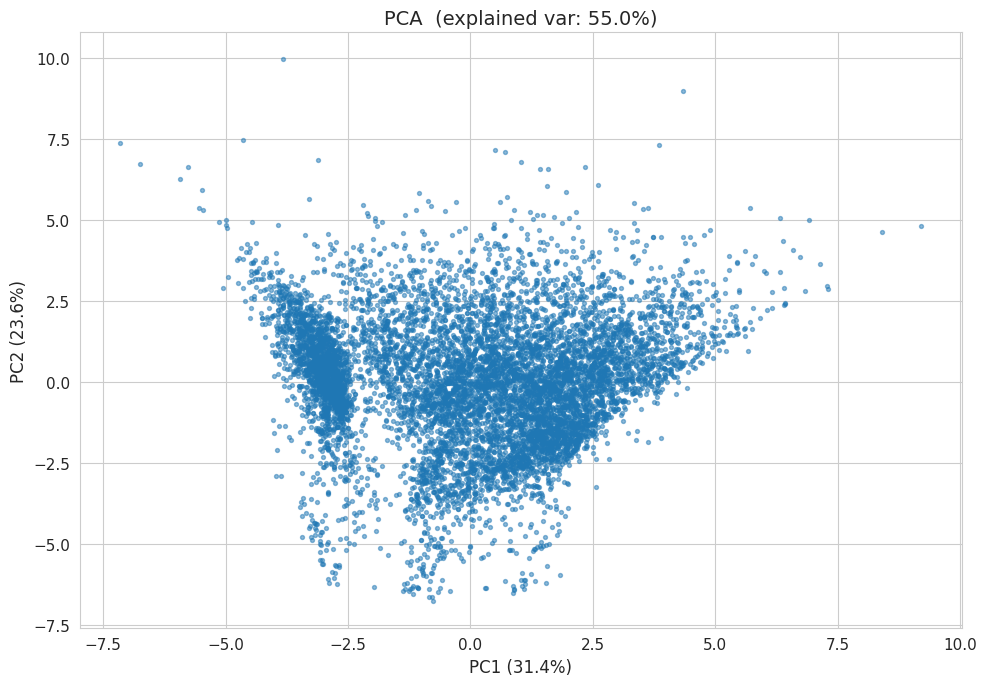

In [25]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], cmap="Set2",
                     s=8, alpha=0.5)
ax.set_title(f"PCA  (explained var: {pca.explained_variance_ratio_.sum()*100:.1f}%)",
             fontsize=14)
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.tight_layout(); plt.show()

/home/zizo/.local/lib/python3.13/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/tmp/ipykernel_11465/3768406740.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap="Set2",


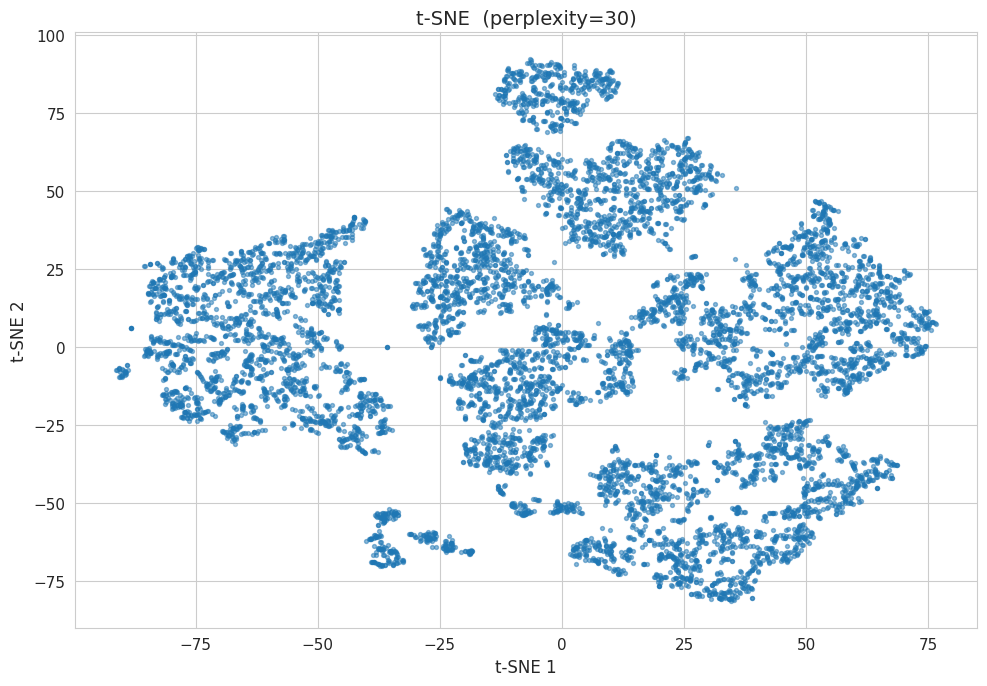

In [26]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap="Set2",
                     s=8, alpha=0.5)
ax.set_title("t-SNE  (perplexity=30)", fontsize=14)
ax.set_xlabel("t-SNE 1"); ax.set_ylabel("t-SNE 2")
plt.tight_layout(); plt.show()

/home/zizo/.local/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_11465/3100426759.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1] ,cmap="Set2",


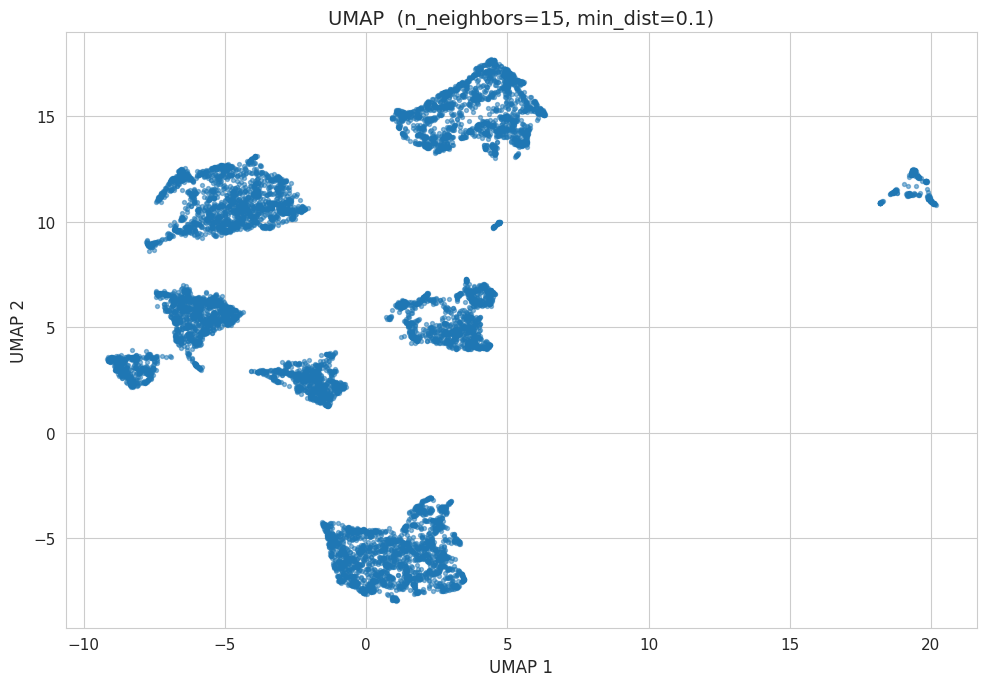

In [27]:
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1] ,cmap="Set2",
                     s=8, alpha=0.5)
ax.set_title("UMAP  (n_neighbors=15, min_dist=0.1)", fontsize=14)
ax.set_xlabel("UMAP 1"); ax.set_ylabel("UMAP 2")
plt.tight_layout(); plt.show()

PCA 10-comp explained variance: 95.2%


/home/zizo/.local/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_11465/3321847778.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_hybrid[:, 0], X_hybrid[:, 1], cmap="Set2",


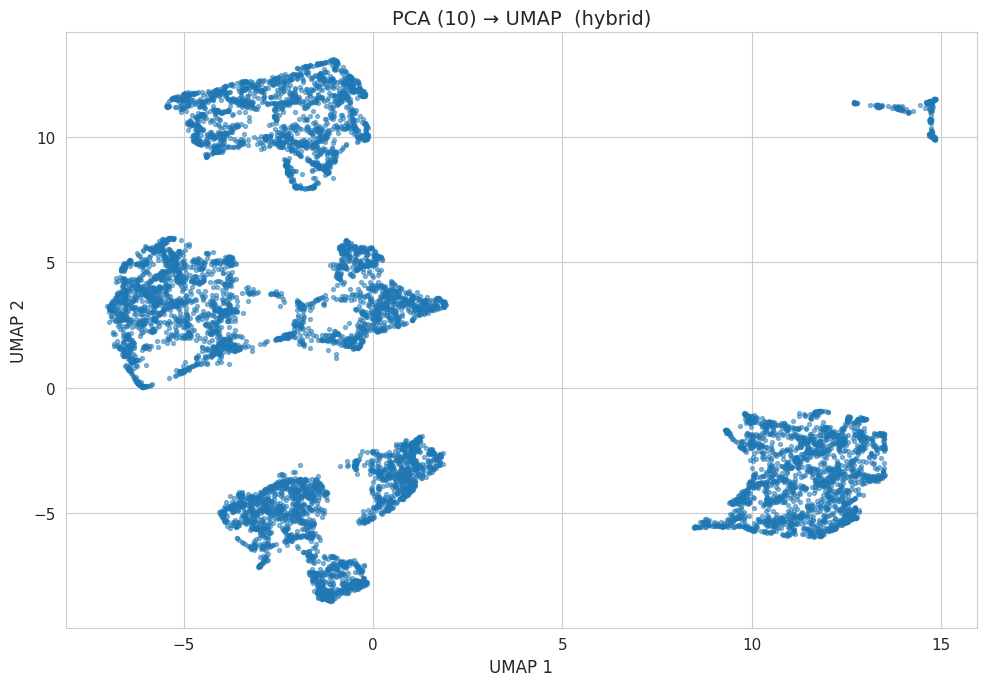

In [28]:
pca10 = PCA(n_components=10, random_state=42)
X_pca10 = pca10.fit_transform(X_scaled)
print(f"PCA 10-comp explained variance: {pca10.explained_variance_ratio_.sum()*100:.1f}%")

reducer2 = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_hybrid = reducer2.fit_transform(X_pca10)

fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(X_hybrid[:, 0], X_hybrid[:, 1], cmap="Set2",
                     s=8, alpha=0.5)
ax.set_title("PCA (10) → UMAP  (hybrid)", fontsize=14)
ax.set_xlabel("UMAP 1"); ax.set_ylabel("UMAP 2")
plt.tight_layout(); plt.show()

### Hierarchical Clustering (Dendrogram)

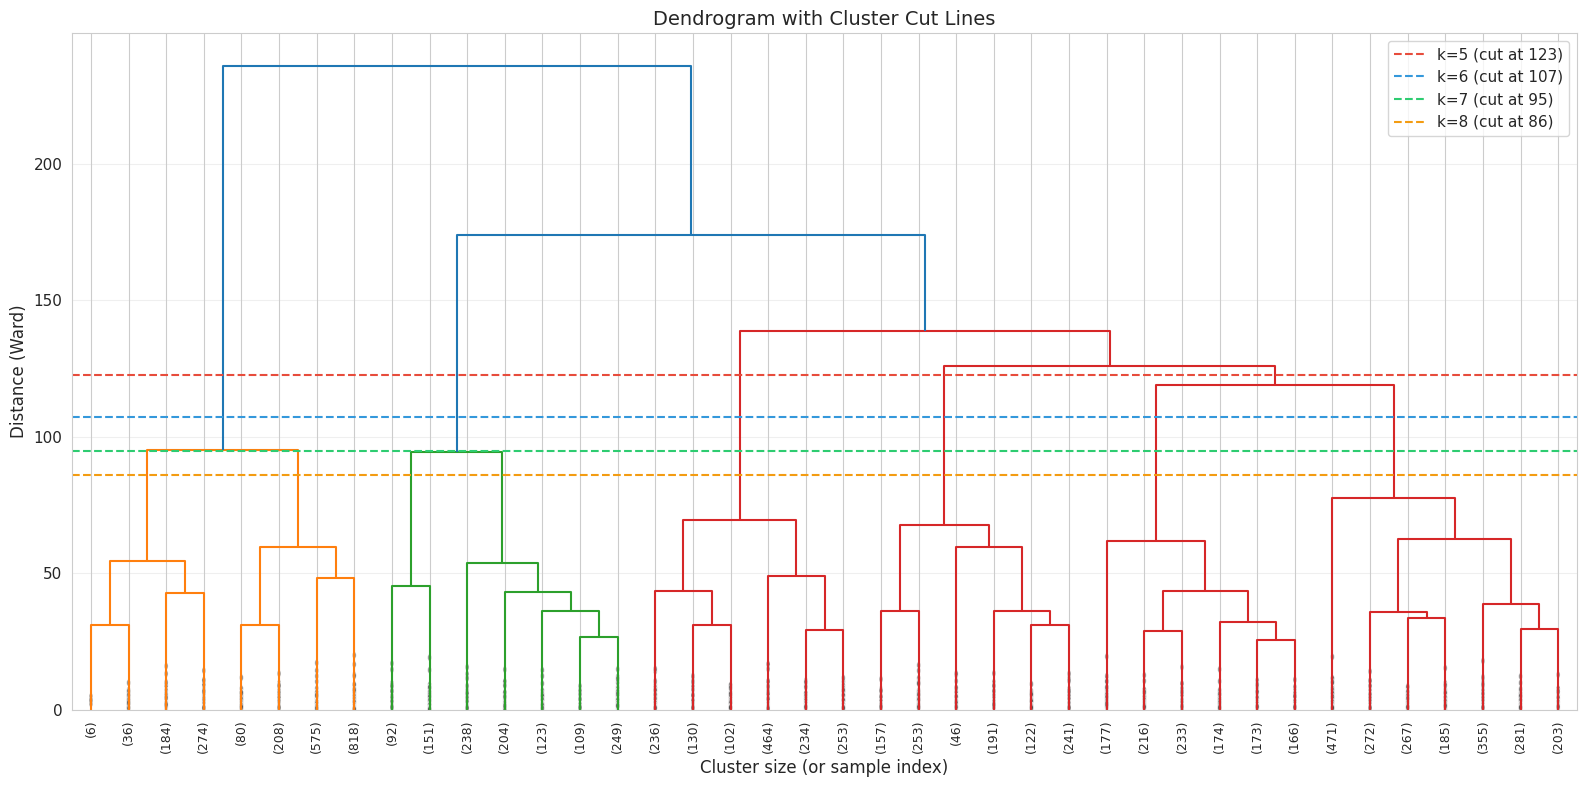

Last 10 merge distances (look for the biggest jump):
  merge → k= 2   distance=     236.0   gap=    62.1 ◀ LARGE GAP
  merge → k= 3   distance=     173.8   gap=    35.2 ◀ LARGE GAP
  merge → k= 4   distance=     138.7   gap=    12.7 ◀ LARGE GAP
  merge → k= 5   distance=     126.0   gap=     7.0
  merge → k= 6   distance=     119.0   gap=    23.7 ◀ LARGE GAP
  merge → k= 7   distance=      95.3   gap=     0.8
  merge → k= 8   distance=      94.5   gap=    17.0 ◀ LARGE GAP
  merge → k= 9   distance=      77.5   gap=     8.1
  merge → k=10   distance=      69.4   gap=     1.6
  merge → k=11   distance=      67.8   gap=     5.2


In [29]:
Z = linkage(X_scaled, method="ward")


fig, ax = plt.subplots(figsize=(16, 8))
dendrogram(Z, truncate_mode="lastp", p=40, leaf_rotation=90,
           leaf_font_size=9, show_contracted=True, ax=ax)
ax.set_title("Dendrogram with Cluster Cut Lines", fontsize=14)
ax.set_xlabel("Cluster size (or sample index)", fontsize=12)
ax.set_ylabel("Distance (Ward)", fontsize=12)

colors = ["#E74C3C", "#3498DB", "#2ECC71", "#F39C12"]
for k, color in zip([5, 6, 7, 8], colors):
    cut_height = (Z[-(k-1), 2] + Z[-k, 2]) / 2
    ax.axhline(y=cut_height, color=color, ls="--", lw=1.5,
               label=f"k={k} (cut at {cut_height:.0f})")

ax.legend(fontsize=11, loc="upper right")
ax.grid(True, axis="y", alpha=0.3)
plt.tight_layout(); plt.show()


# Print the last 10 merge distances (biggest gaps)
print("Last 10 merge distances (look for the biggest jump):")
for i in range(min(10, len(Z))):
    idx = len(Z) - 1 - i
    gap = Z[idx, 2] - Z[idx-1, 2] if idx > 0 else 0
    k = len(Z) - idx + 1
    marker = " ◀ LARGE GAP" if gap > Z[-1, 2] * 0.05 else ""
    print(f"  merge → k={k:2d}   distance={Z[idx,2]:10.1f}   gap={gap:8.1f}{marker}")

### Kmeans Clusters

KMeans k=6  Inertia=68302.5
KMeans k=7  Inertia=64158.1
KMeans k=8  Inertia=60382.6


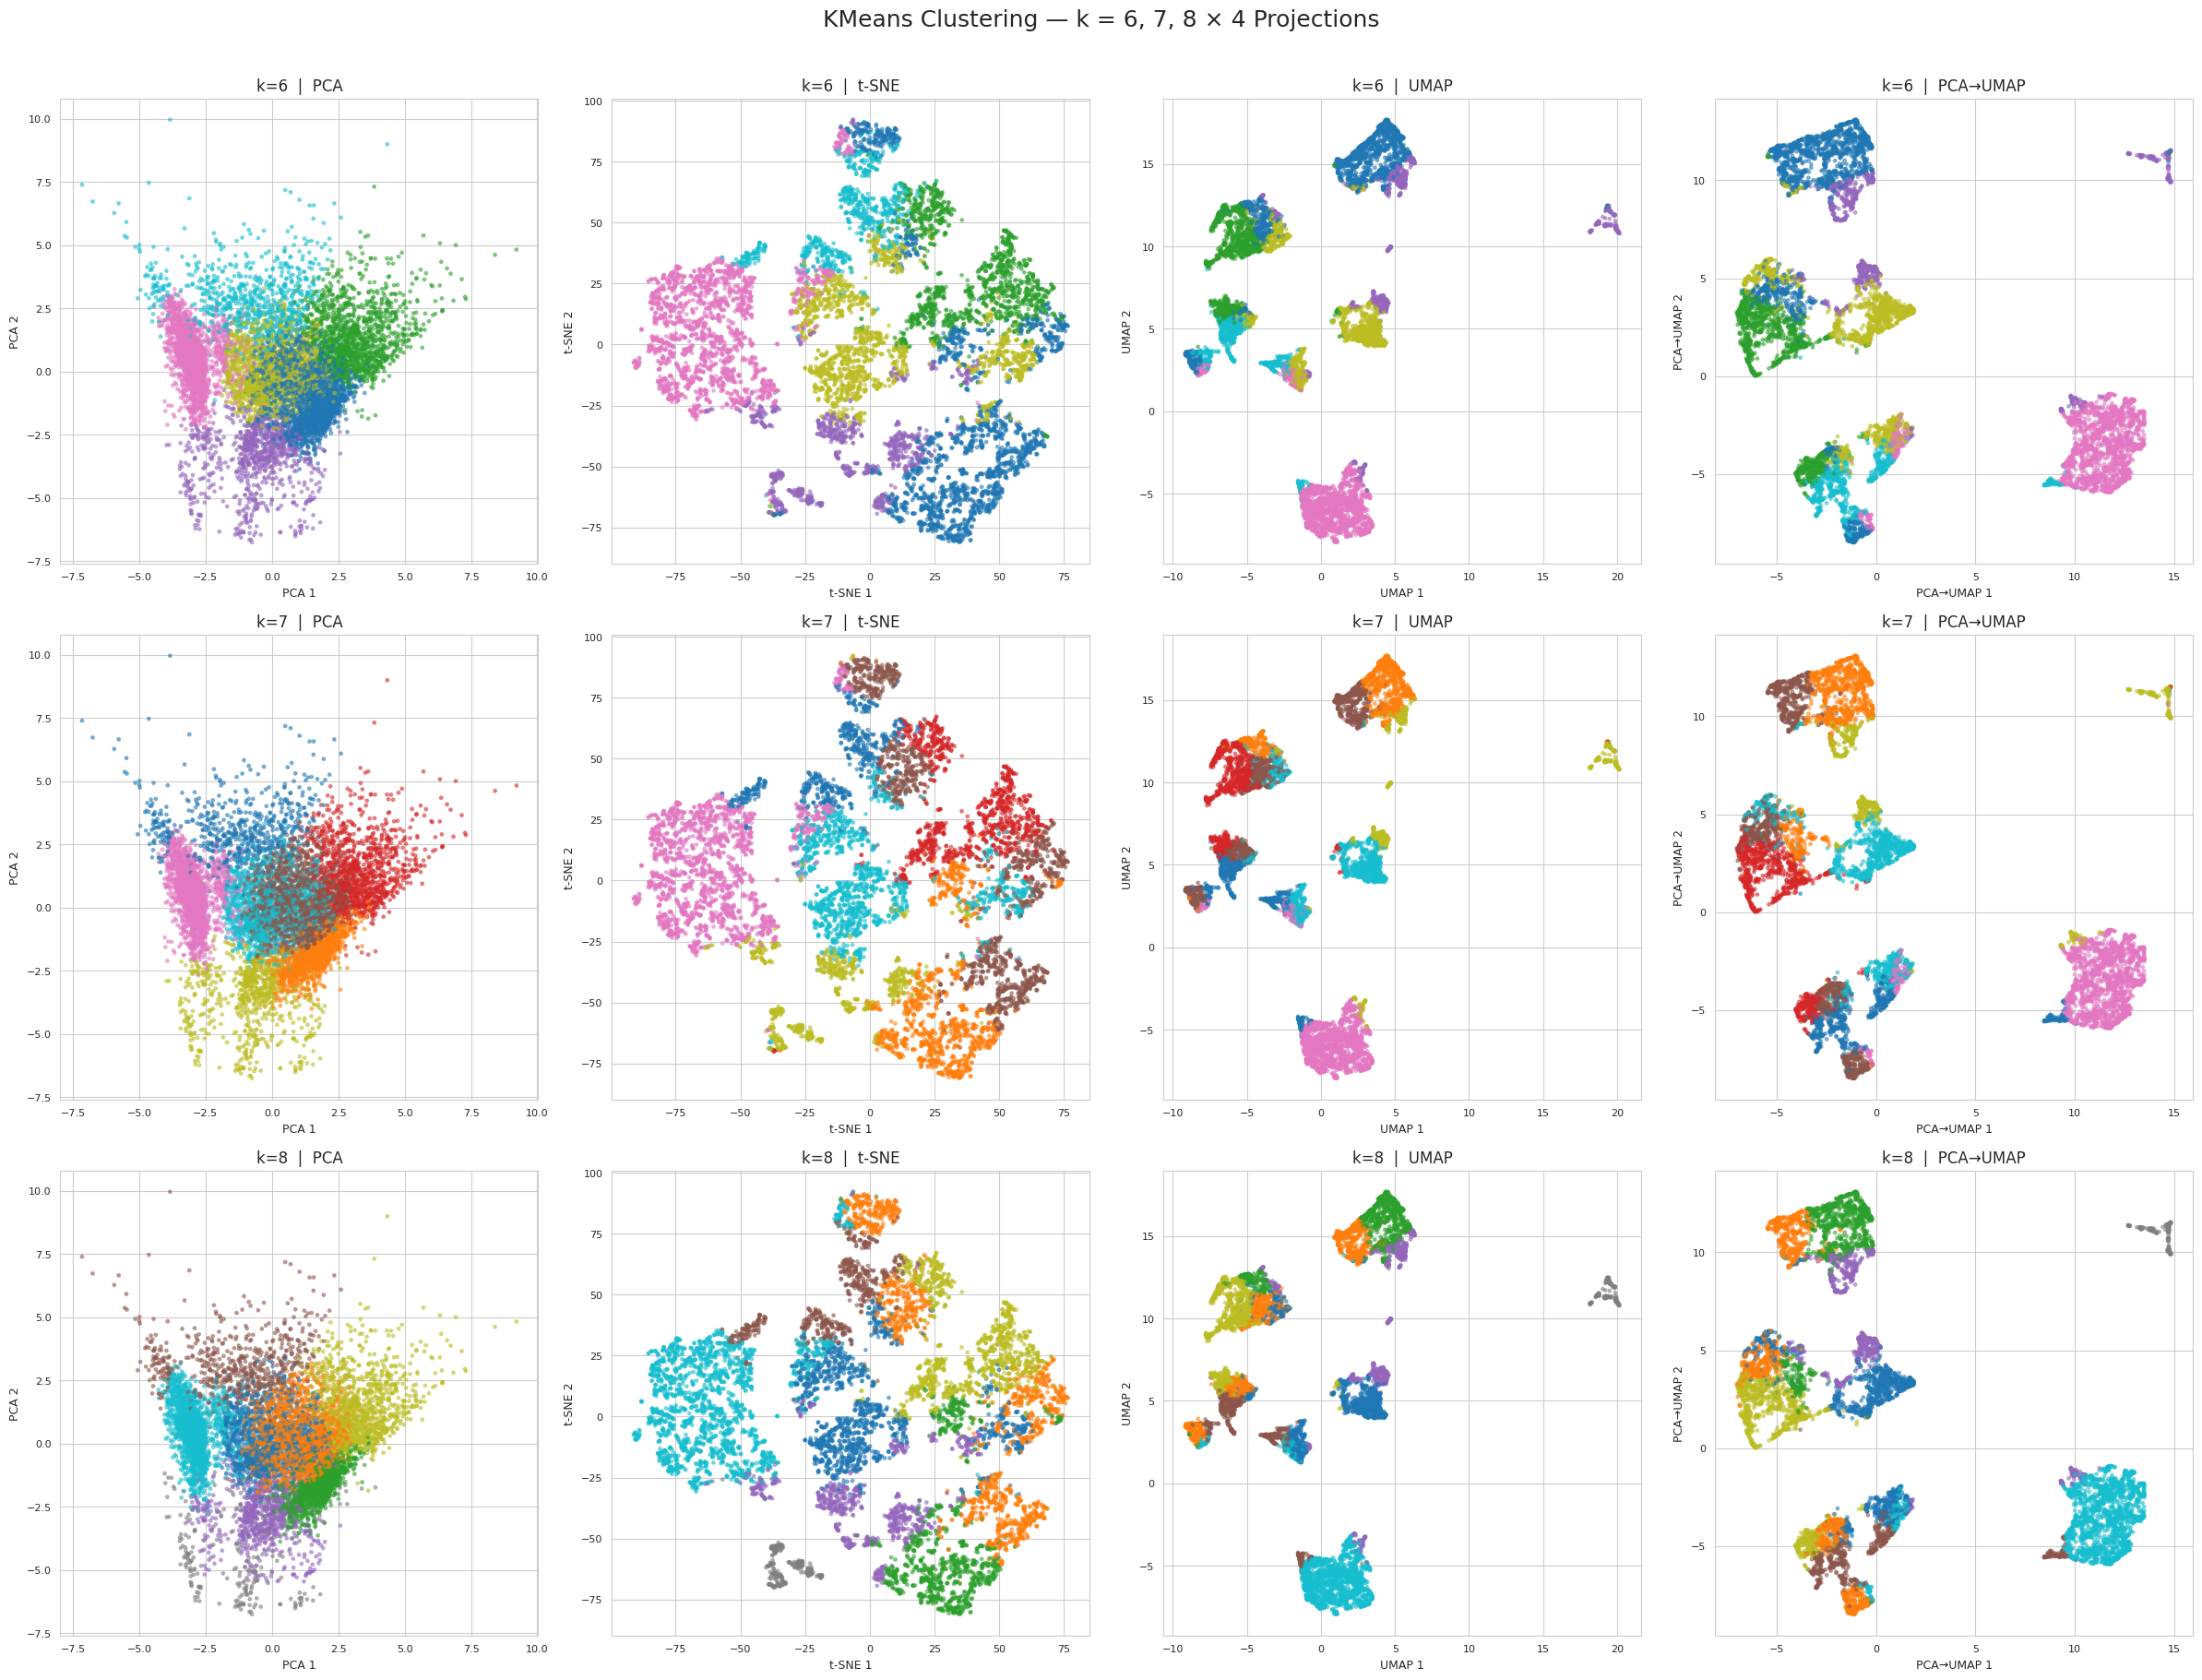

In [30]:
kmeans_ks = [6, 7, 8]

kmeans_results = {}
for k in kmeans_ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_scaled)
    kmeans_results[k] = {
        'labels': km.labels_,
        'model': km,
        'inertia': km.inertia_,
    }
    print(f'KMeans k={k}  Inertia={km.inertia_:.1f}')

projections = {
    'PCA': X_pca,
    't-SNE': X_tsne,
    'UMAP': X_umap,
    'PCA\u2192UMAP': X_hybrid
}

fig, axes = plt.subplots(len(kmeans_ks), 4, figsize=(24, 6 * len(kmeans_ks)))
fig.suptitle('KMeans Clustering \u2014 k = {} \u00d7 4 Projections'.format(
    ', '.join(str(k) for k in kmeans_ks)), fontsize=18, y=1.01)

for row, k in enumerate(kmeans_ks):
    lbl = kmeans_results[k]['labels']
    for col, (proj_name, X_proj) in enumerate(projections.items()):
        ax = axes[row, col]
        scatter = ax.scatter(X_proj[:, 0], X_proj[:, 1], c=lbl, cmap='tab10',
                             s=6, alpha=0.5)
        ax.set_title(f'k={k}  |  {proj_name}', fontsize=12)
        ax.set_xlabel(f'{proj_name} 1', fontsize=9)
        ax.set_ylabel(f'{proj_name} 2', fontsize=9)
        ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()


### GMM Clusters

GMM k=6  BIC=-251089.7  AIC=-257599.8
GMM k=7  BIC=-293343.9  AIC=-300940.1
GMM k=8  BIC=-301863.9  AIC=-310546.3


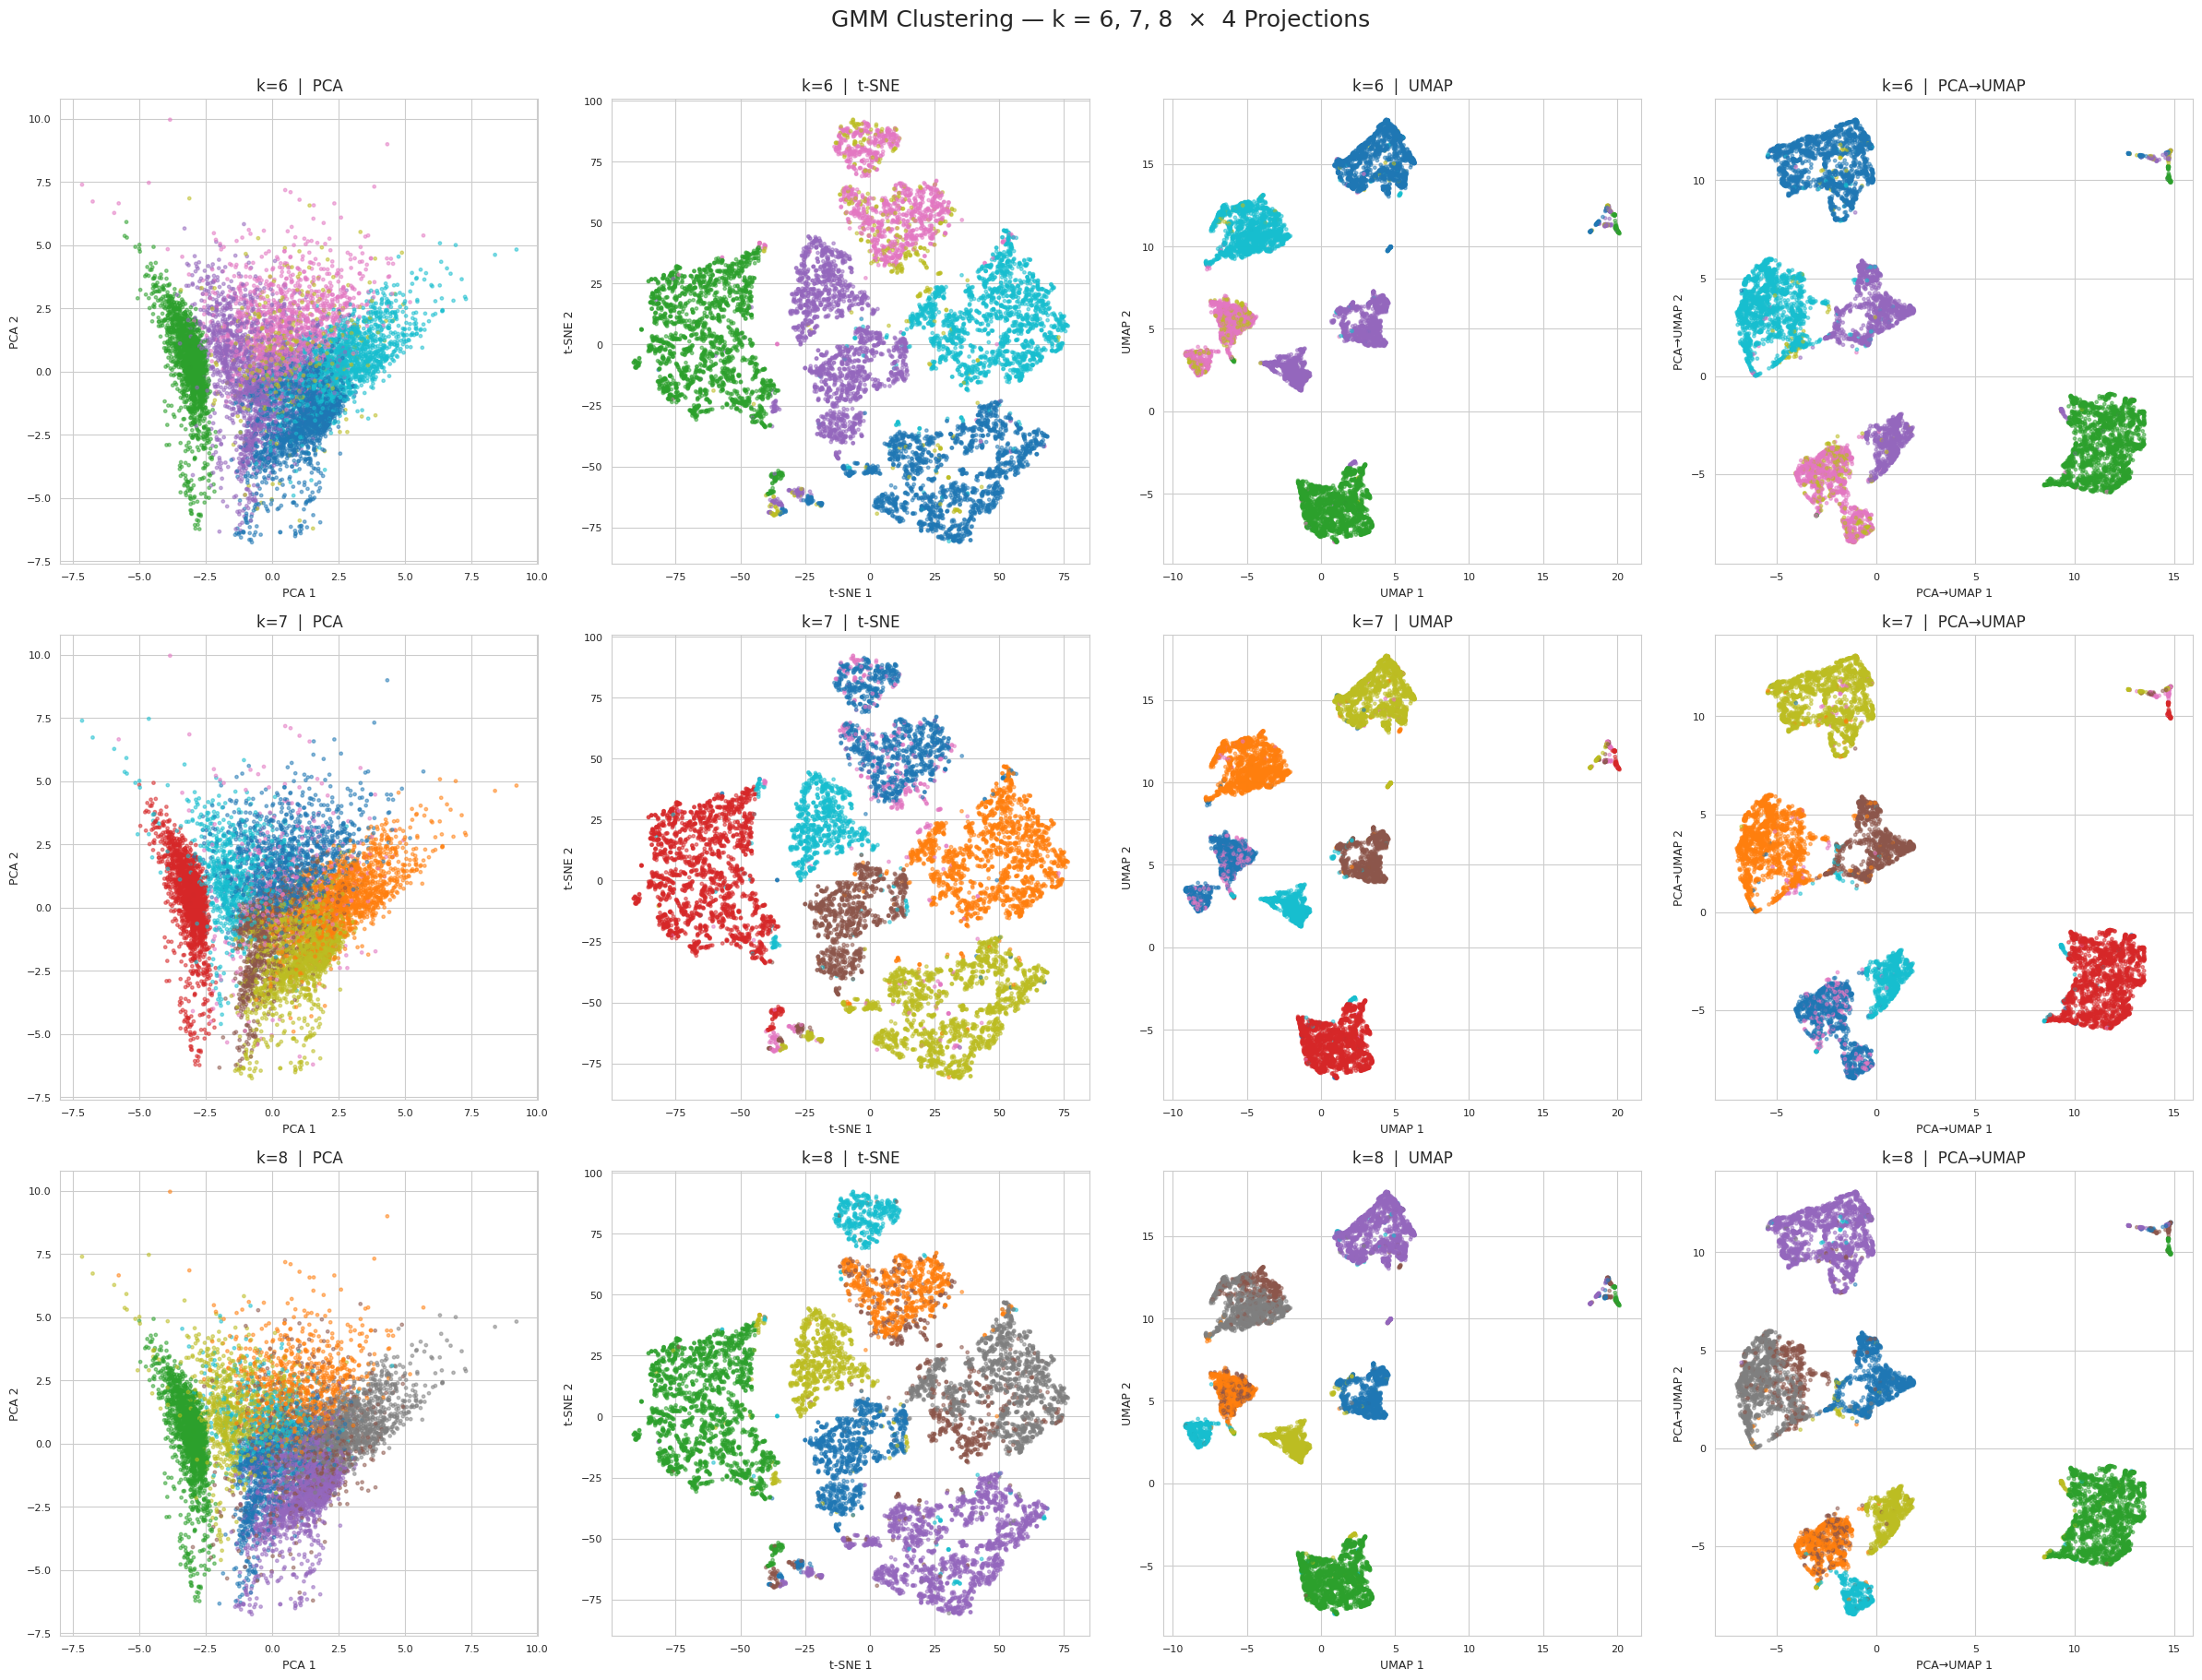

In [31]:
gmm_ks = [6, 7, 8]
gmm_results = {}
for k in gmm_ks:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42, n_init=5)
    gmm.fit(X_scaled)
    gmm_results[k] = {
        'labels': gmm.predict(X_scaled),
        'model': gmm,
        'bic': gmm.bic(X_scaled),
        'aic': gmm.aic(X_scaled),
    }
    print(f'GMM k={k}  BIC={gmm.bic(X_scaled):.1f}  AIC={gmm.aic(X_scaled):.1f}')

projections = {
    'PCA': X_pca,
    't-SNE': X_tsne,
    'UMAP': X_umap,
    'PCA\u2192UMAP': X_hybrid
}

fig, axes = plt.subplots(len(gmm_ks), 4, figsize=(24, 6 * len(gmm_ks)))
fig.suptitle('GMM Clustering \u2014 k = 6, 7, 8  \u00d7  4 Projections', fontsize=18, y=1.01)

for row, k in enumerate(gmm_ks):
    lbl = gmm_results[k]['labels']
    for col, (proj_name, X_proj) in enumerate(projections.items()):
        ax = axes[row, col]
        scatter = ax.scatter(X_proj[:, 0], X_proj[:, 1], c=lbl, cmap='tab10',
                             s=6, alpha=0.5)
        ax.set_title(f'k={k}  |  {proj_name}', fontsize=12)
        ax.set_xlabel(f'{proj_name} 1', fontsize=9)
        ax.set_ylabel(f'{proj_name} 2', fontsize=9)
        ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()


### DBSCAN Clusters


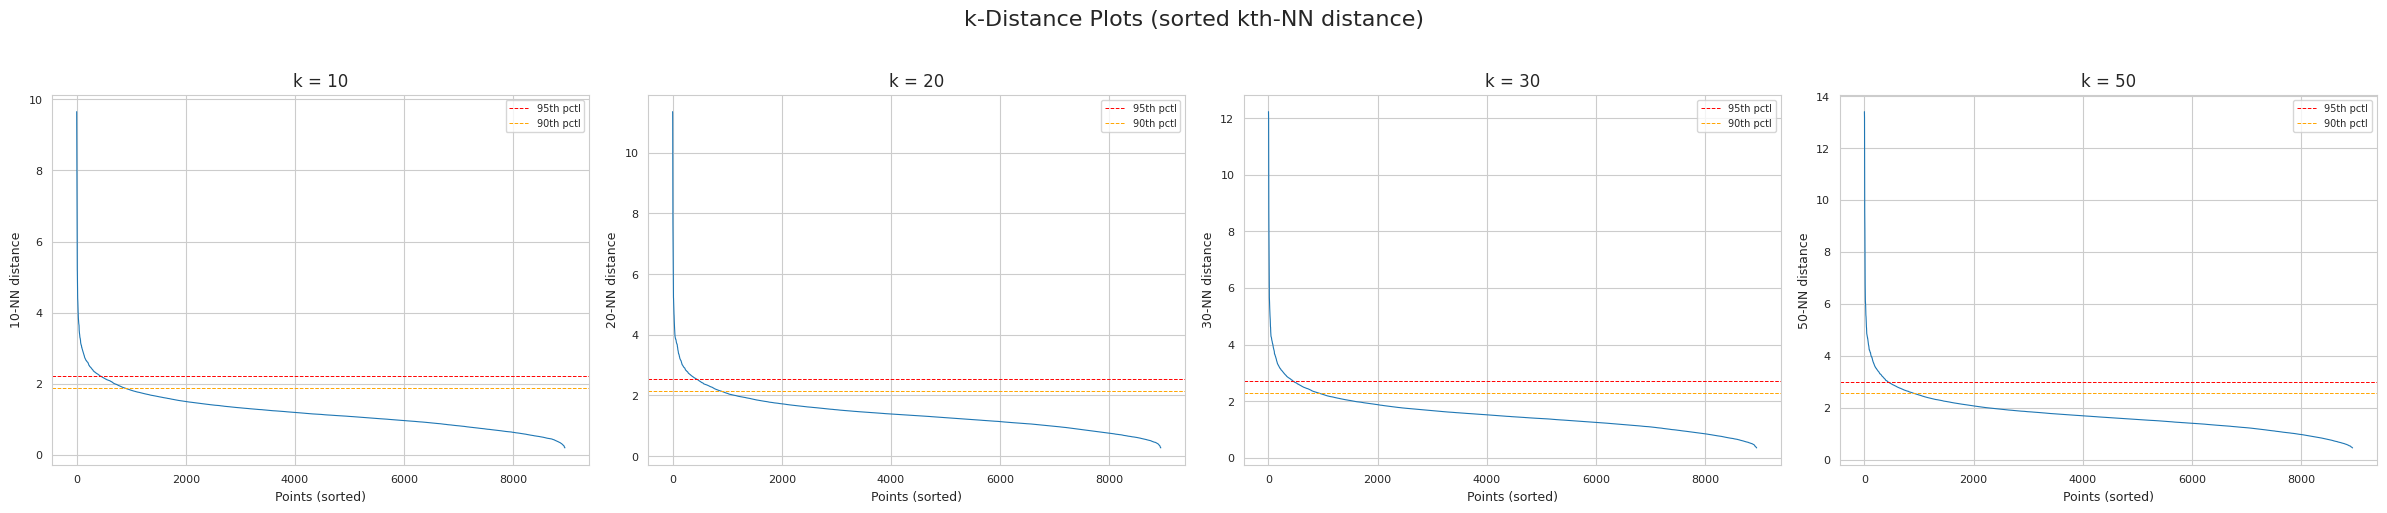


=== Top 10 DBSCAN configs by Silhouette Score ===
 eps  min_samples  n_clusters  n_noise  noise_pct  silhouette
 2.5           50           2      255        2.8      0.3308
 2.0           10           2      259        2.9      0.3060
 2.0           15           2      359        4.0      0.3004
 2.0           20           2      397        4.4      0.2951
 2.0           30           3      493        5.5      0.2657
 2.5           30           2      164        1.8      0.2625
 1.5           10           5     1007       11.3      0.1579
 1.5           15           6     1220       13.6      0.1520
 1.5           30           3     1884       21.1      0.0776
 1.5           20           5     1420       15.9      0.0617

→ Best config:  eps=2.5  min_samples=50
  Clusters: 2   Noise: 255 (2.8%)   Silhouette: 0.3308


In [32]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

k_values = [10, 20, 30, 50]          

fig, axes = plt.subplots(1, len(k_values), figsize=(6 * len(k_values), 5))
fig.suptitle('k-Distance Plots (sorted kth-NN distance)', fontsize=16, y=1.02)

for idx, k in enumerate(k_values):
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(X_scaled)
    distances, _ = nn.kneighbors(X_scaled)
    k_dist = np.sort(distances[:, -1])[::-1]   
    ax = axes[idx]
    ax.plot(k_dist, linewidth=0.8)
    ax.set_title(f'k = {k}', fontsize=12)
    ax.set_xlabel('Points (sorted)', fontsize=9)
    ax.set_ylabel(f'{k}-NN distance', fontsize=9)
    ax.axhline(y=np.percentile(k_dist, 95), color='r',
               linestyle='--', linewidth=0.7, label='95th pctl')
    ax.axhline(y=np.percentile(k_dist, 90), color='orange',
               linestyle='--', linewidth=0.7, label='90th pctl')
    ax.legend(fontsize=7)
    ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()


eps_candidates = np.arange(1.5, 5.5, 0.5)
min_samples_candidates = [10, 15, 20, 30, 50]

results = []
for eps in eps_candidates:
    for ms in min_samples_candidates:
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(X_scaled)
        n_clusters = len(set(labels) - {-1})
        n_noise    = (labels == -1).sum()
        noise_pct  = n_noise / len(labels) * 100
        # silhouette score requires >= 2 clusters and < n-1 clusters
        if 2 <= n_clusters < len(labels) - 1:
            sil = silhouette_score(X_scaled, labels)
        else:
            sil = -1
        results.append({
            'eps': round(eps, 2),
            'min_samples': ms,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_pct': round(noise_pct, 1),
            'silhouette': round(sil, 4),
        })

df_results = pd.DataFrame(results)

# Show top-10 by silhouette score
print('\n=== Top 10 DBSCAN configs by Silhouette Score ===')
print(df_results[df_results['silhouette'] > 0]
      .sort_values('silhouette', ascending=False)
      .head(10)
      .to_string(index=False))

# Auto-pick best: highest silhouette with noise < 30%
valid = df_results[(df_results['silhouette'] > 0) &
                   (df_results['noise_pct'] < 30)]
if len(valid) > 0:
    best = valid.sort_values('silhouette', ascending=False).iloc[0]
else:
    best = df_results.sort_values('silhouette', ascending=False).iloc[0]

best_eps  = best['eps']
best_ms   = int(best['min_samples'])
print(f'\n\u2192 Best config:  eps={best_eps}  min_samples={best_ms}')
print(f'  Clusters: {int(best["n_clusters"])}   '
      f'Noise: {int(best["n_noise"])} ({best["noise_pct"]}%)   '
      f'Silhouette: {best["silhouette"]}')


DBSCAN  eps=2.5, min_samples=50
  Clusters found : 2
  Noise points   : 255  (2.8%)


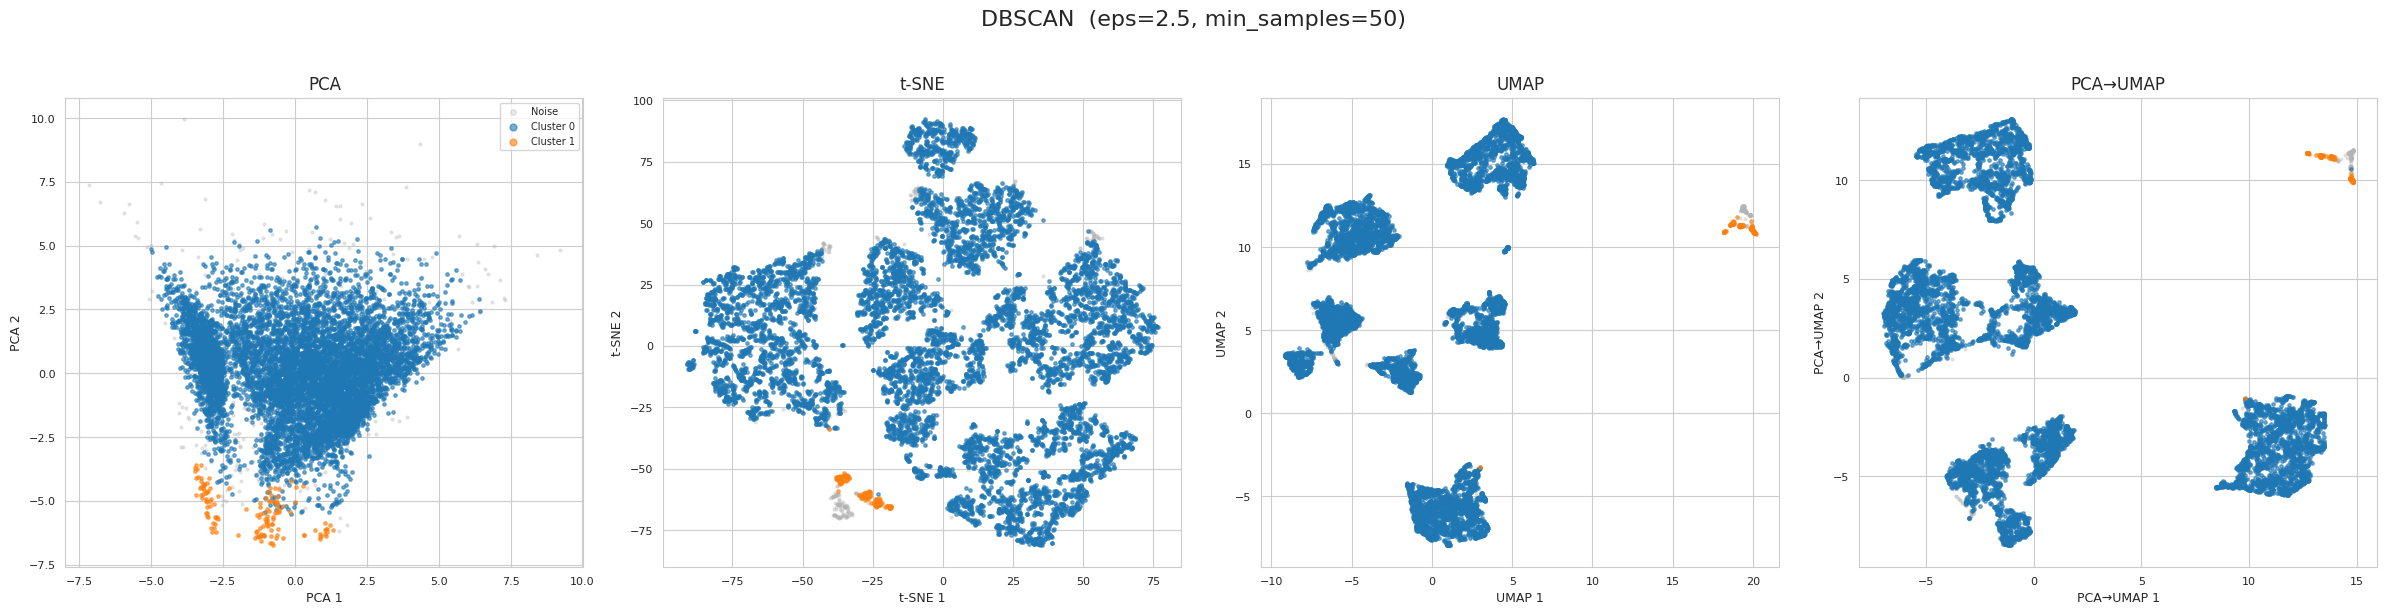

In [33]:
eps_val  = best_eps
min_samp = best_ms
dbscan_model  = DBSCAN(eps=eps_val, min_samples=min_samp)
dbscan_labels = dbscan_model.fit_predict(X_scaled)

n_clusters = len(set(dbscan_labels) - {-1})
n_noise    = (dbscan_labels == -1).sum()
print(f'DBSCAN  eps={eps_val}, min_samples={min_samp}')
print(f'  Clusters found : {n_clusters}')
print(f'  Noise points   : {n_noise}  ({n_noise/len(dbscan_labels)*100:.1f}%)')

fig, axes = plt.subplots(1, 4, figsize=(24, 6))
fig.suptitle(f'DBSCAN  (eps={eps_val}, min_samples={min_samp})', fontsize=16, y=1.02)

unique_labels = sorted(set(dbscan_labels))
colors = plt.cm.tab10(np.linspace(0, 1, max(len(unique_labels), 10)))
color_map = {}
ci = 0
for l in unique_labels:
    if l == -1:
        color_map[l] = (0.7, 0.7, 0.7, 0.3)   
    else:
        color_map[l] = colors[ci]
        ci += 1

point_colors = [color_map[l] for l in dbscan_labels]

for col, (proj_name, X_proj) in enumerate(projections.items()):
    ax = axes[col]
    # Draw noise first (behind)
    noise_mask = dbscan_labels == -1
    ax.scatter(X_proj[noise_mask, 0], X_proj[noise_mask, 1],
               c=[(0.7,0.7,0.7,0.3)], s=4, label='Noise')
    # Draw clusters on top
    for cl in sorted(set(dbscan_labels)):
        if cl == -1:
            continue
        mask = dbscan_labels == cl
        ax.scatter(X_proj[mask, 0], X_proj[mask, 1],
                   c=[color_map[cl]], s=6, alpha=0.6, label=f'Cluster {cl}')
    ax.set_title(f'{proj_name}', fontsize=12)
    ax.set_xlabel(f'{proj_name} 1', fontsize=9)
    ax.set_ylabel(f'{proj_name} 2', fontsize=9)
    ax.tick_params(labelsize=8)
    if col == 0:
        ax.legend(fontsize=7, loc='best', markerscale=2)

plt.tight_layout()
plt.show()


## 5. Clustering 


After visualizing the data and comparing different clustering models , I found that GMM is the best model for this data with 8 clusters.

In [34]:
gmm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gmm', GaussianMixture(n_components=8, 
                             covariance_type='full', 
                             reg_covar=1e-6, 
                             random_state=42))
])

gmm_pipeline.fit(df_cleaned)
labels = gmm_pipeline.predict(df_cleaned)
df_cleaned_without_log['cluster'] = labels

In [38]:
df_cleaned_without_log.to_csv('customer_segmentation.csv', index=False)

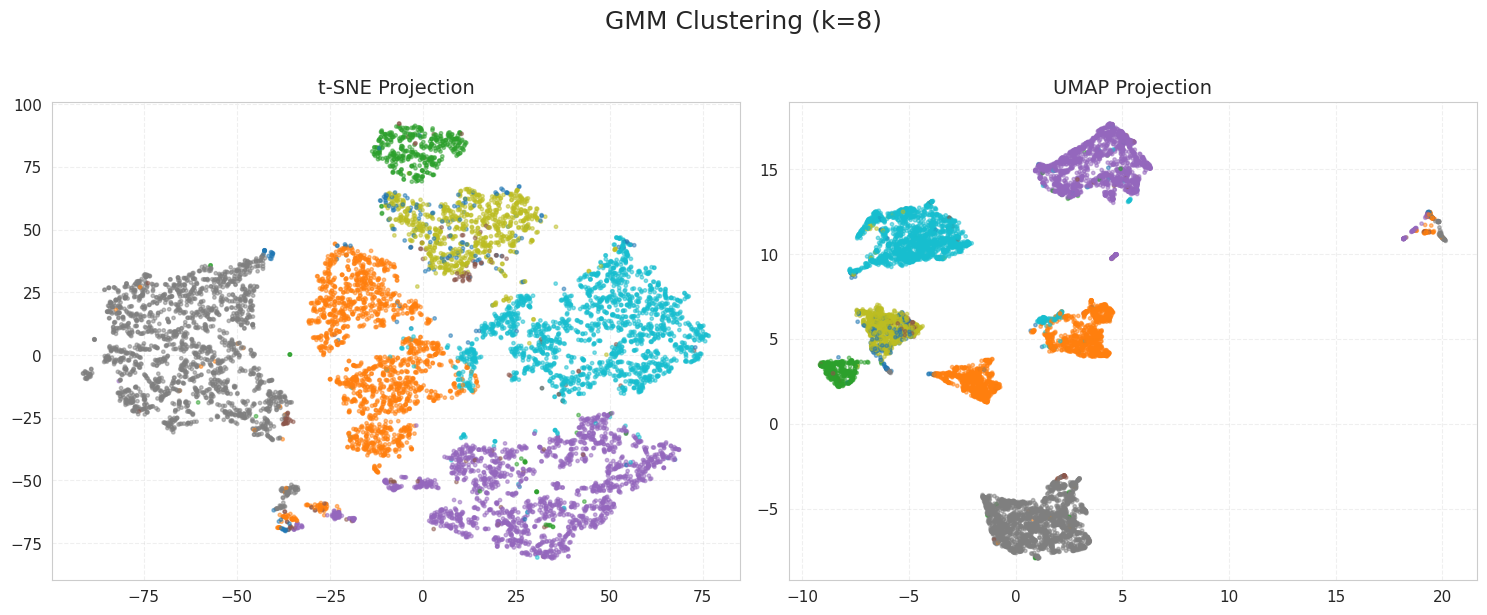

In [35]:
projections = {
    't-SNE': X_tsne,
    'UMAP': X_umap
}

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, (proj_name, X_proj) in enumerate(projections.items()):
    ax = axes[i] 
    
    scatter = ax.scatter(
        X_proj[:, 0], 
        X_proj[:, 1], 
        c=labels,          
        cmap='tab10',      
        s=6,               
        alpha=0.5          
    )
    
    ax.set_title(f'{proj_name} Projection', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.3)


fig.suptitle('GMM Clustering (k=8)', fontsize=18, y=1.02)

plt.tight_layout()
plt.show()

In [ ]:
import joblib

filename = 'gmm_clustering_pipeline.joblib'
joblib.dump(gmm_pipeline, filename)

print(f"Pipeline saved as {filename}")

Pipeline saved as gmm_clustering_pipeline.joblib


## 6. Cluster Profiling

In [37]:
cluster_profile = df_cleaned_without_log.groupby('cluster').mean()

cluster_profile[('cluster_size', 'count')] = df_cleaned_without_log['cluster'].value_counts()

cluster_profile

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                  
0        2514.399039           0.900960  2239.839728       1345.931413   
1        1487.468024           0.835620   665.669379        665.669379   
2        2599.684963           0.964968   503.612414          0.000000   
3         390.431229           0.787971   530.575414          0.000000   
4         737.862699           0.627288   756.019485        287.270074   
5        2173.121670           0.889600     0.000000          0.000000   
6        3069.985730           1.000000  1985.137583       1206.308409   
7        1171.592068           0.931353  2453.328120       1559.595623   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                    900.968370   3435.568352             0.727789   
1                      0.000000    887.888263             0.292360   
2                    503.612414   2016.002051             0.656388   
3                    530.575414      0.000000             0.705571   
4                    474.431250    936.549867             0.466570   
5                      0.000000   1990.214706             0.000000   
6                    778.856572   1944.495685             0.796191   
7                    894.053532      0.000000             0.807787   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.399482                          0.530012   
1                          0.292360                          0.000000   
2                          0.000000                          0.608728   
3                          0.000000                          0.672010   
4                          0.098026                          0.399575   
5                          0.000000                          0.000000   
6                          0.410805                          0.648526   
7                          0.478489                          0.606115   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
0                      0.414231         17.657609      41.282609   
1                      0.129955          2.887356       5.559195   
2                      0.259640          5.625287      11.179310   
3                      0.000000          0.000000      11.502800   
4                      0.093124          1.647059       8.500000   
5                      0.273809          6.205370       0.000000   
6                      0.284580          6.970407      30.705302   
7                      0.000000          0.000000      34.083965   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
cluster                                                                  
0         5430.163043  3861.241471       1591.137629          0.108846   
1         4347.878091  1405.132685        706.919511          0.051690   
2         4359.080460  1951.706888       1461.844126          0.037222   
3         3106.614437   727.833939        642.547004          0.306393   
4         4159.272876  2406.990504        570.940337          0.300764   
5         4033.946627  1606.969549        978.375554          0.032951   
6         6004.808878  2978.061811       1254.648812          0.056215   
7         5776.776322  2293.147682        593.258808          0.297729   

         (cluster_size, count)  
cluster                         
0                          184  
1                         1740  
2                          435  
3                         1786  
4                          136  
5                         2011  
6                          811  
7                         1846